In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import networkx as nx
import statistics

In [2]:
riot_philadelphia_superbowl_df = pd.read_csv('/home/cquirk/EventCSVs/riot_philadelphia_superbowl.csv')

In [3]:
riot_philadelphia_superbowl_df

Unnamed: 0                                             Source  \
0         210977  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
1         210978  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
2         210979  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
3         210980  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
4         210981  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
...          ...                                                ...   
1017      211994  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1018      211995  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1019      211996  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1020      211997  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1021      211998  89647023735340bdff9a8c5d222f2d28197b05f6996446...   

                                                 Target Emotion   Timestamp  \
0     24680bba6628fe320ab162aed12f99c2df89a6c67976d8...   Anger  2018-02-04   
1     4b19da469528e096da234c9d36f5e8759ae6af3076b0ab...   Anger  2018-02-04   
2     588cca59fdc58d5ebb3ab21e0748ce7a96927ac67aec3d...   Anger  2018-02-04   
3     45afeec9161994ad2dd982a3aa553fed2cd16fb10fae34...   Anger  2018-02-04   
4     04f687d115b133db092102da1a05f4acd75cabb9bc18f0...   Anger  2018-02-04   
...                                                 ...     ...         ...   
1017  3a4d3f988901f502b44f63bbe31821650729a18389349b...   Trust  2018-02-10   
1018  725daf6626f8428235c06dabc0976abfd8b3ae29a9de15...   Trust  2018-02-10   
1019  8a49b6b3540be495e9764130677c35d765da59fd893d23...   Trust  2018-02-10   
1020  bec926830b6b498e719878a7af72f83d7019f14db2dc80...   Trust  2018-02-10   
1021  196de2870ef56b723014fe5d6cbed0393b6f4297f6339b...   Trust  2018-02-10   

                            Event    Color  
0     riot_philadelphia_superbowl  #d62728  
1     riot_philadelphia_superbowl  #d62728  
2     riot_philadelphia_superbowl  #d62728  
3     riot_philadelphia_superbowl  #d62728  
4     riot_philadelphia_superbowl  #d62728  
...                           ...      ...  
1017  riot_philadelphia_superbowl  #1f77b4  
1018  riot_philadelphia_superbowl  #1f77b4  
1019  riot_philadelphia_superbowl  #1f77b4  
1020  riot_philadelphia_superbowl  #1f77b4  
1021  riot_philadelphia_superbowl  #1f77b4  

[1022 rows x 7 columns]

## Undirected

In [4]:
G_sup = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df, source = 'Source', target = 'Target', edge_attr = ['Emotion'], create_using=nx.MultiGraph())

In [5]:
color_of_emotion={'Anger': '#d62728', 
                    'Anticipation':'#ff7f0e', 
                    'Disgust':'#2ca02c',
                    'Fear':'#9467bd',
                    'Joy':'#bcbd22',
                    'Sadness':'#17becf',
                    'Surprise':'#e377c2',
                    'Trust':'#1f77b4',
                    'neutral':'gray'}
emotion_colors = [color_of_emotion[prop['Emotion']] for u, v, prop in G_sup.edges(data=True)]

In [6]:
from matplotlib.lines import Line2D

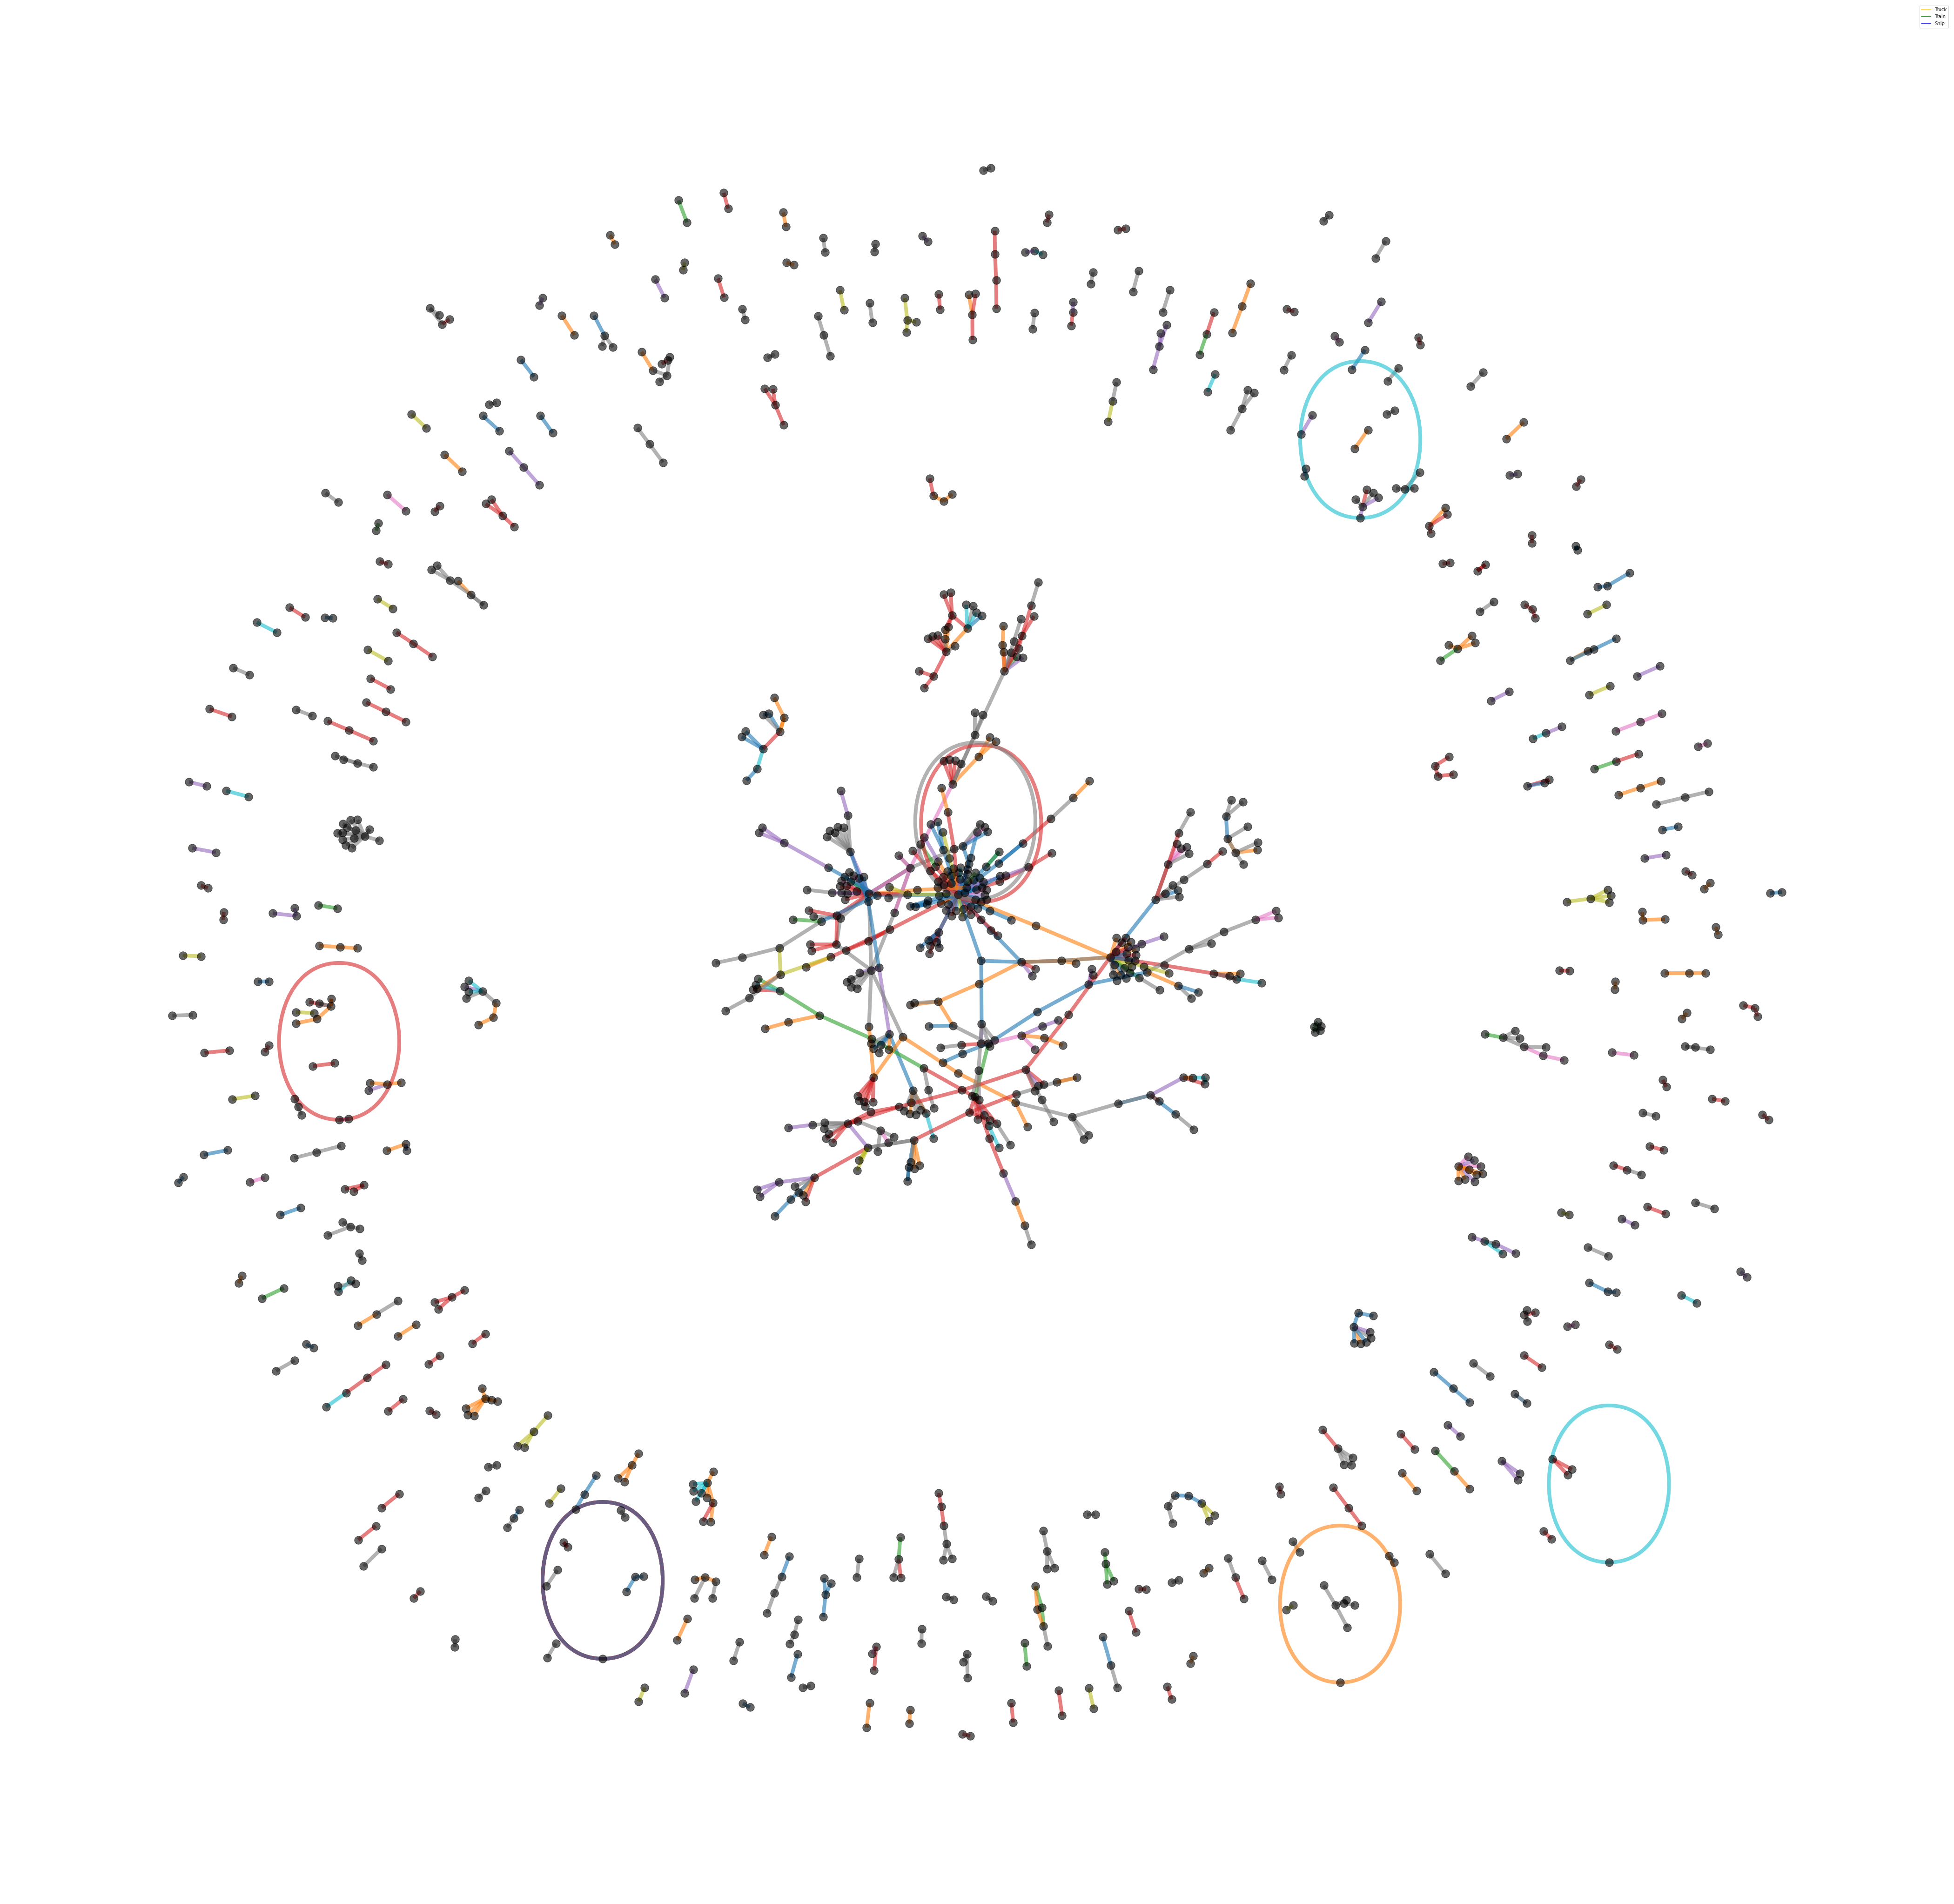

In [7]:
fig, ax = plt.subplots(figsize=(75,75))
pos = nx.spring_layout(G_sup, seed=7)
nx.draw(G_sup, pos = pos, width = 8, node_color = 'black', alpha=0.6, edge_color = emotion_colors)

handles = [Line2D([], [], color=color, label=label)
           for color, label in zip(["Gold", "Green", "Blue"], ["Truck", "Train", "Ship"])]
ax.legend(handles=handles)

## Directed 

In [8]:
G_sup_d = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df, source = 'Source', target = 'Target', edge_attr = ['Emotion'], create_using=nx.MultiDiGraph())

In [9]:
emotion_colors_d = [color_of_emotion[prop['Emotion']] for u, v, prop in G_sup_d.edges(data=True)]

# Metrics

In [12]:
print("Number of nodes: " + str(G_sup.number_of_nodes()))
print("Number of edges: " + str(G_sup.number_of_edges()))
print("Number of selfloops: " + str(nx.number_of_selfloops(G_sup)))

Number of nodes: 1164
Number of edges: 1022
Number of selfloops: 10


In [14]:
G_sup = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df, source = 'Source', target = 'Target', edge_attr = ['Emotion'])

In [15]:
#NOT TREATING AS A MULTIGRAPH - loosing info
print("Max Degree Centrality: " + str(max(nx.degree_centrality(G_sup).values())))
print("Max Closeness Centrality: " + str(max(nx.closeness_centrality(G_sup).values())))
print("Max Eigenvector Centrality: " + str(max(nx.eigenvector_centrality(G_sup).values())))
print("Max Betweenness Centrality: " + str(max(nx.betweenness_centrality(G_sup).values())))
print("")
print("Min Degree Centrality: " + str(min(nx.degree_centrality(G_sup).values())))
print("Min Closeness Centrality: " + str(min(nx.closeness_centrality(G_sup).values())))
print("Min Eigenvector Centrality: " + str(min(nx.eigenvector_centrality(G_sup).values())))
print("Min Betweenness Centrality: " + str(min(nx.betweenness_centrality(G_sup).values())))
print("")
print("Mean Degree Centrality: " + str(statistics.mean(nx.degree_centrality(G_sup).values())))
print("Mean Closeness Centrality: " + str(statistics.mean(nx.closeness_centrality(G_sup).values())))
print("Mean Eigenvector Centrality: " + str(statistics.mean(nx.eigenvector_centrality(G_sup).values())))
print("Mean Betweenness Centrality: " + str(statistics.mean(nx.betweenness_centrality(G_sup).values())))

Max Degree Centrality: 0.051590713671539126
Max Closeness Centrality: 0.0646608160795607
Max Eigenvector Centrality: 0.6994822001380625
Max Betweenness Centrality: 0.07566593959321227

Min Degree Centrality: 0.0008598452278589854
Min Closeness Centrality: 0.0
Min Eigenvector Centrality: 1.6641197382962058e-23
Min Betweenness Centrality: 0.0

Mean Degree Centrality: 0.0013503411310362761
Mean Closeness Centrality: 0.01424233939890673
Mean Eigenvector Centrality: 0.005884332274141974
Mean Betweenness Centrality: 0.0006821557813177977


# Connected Component

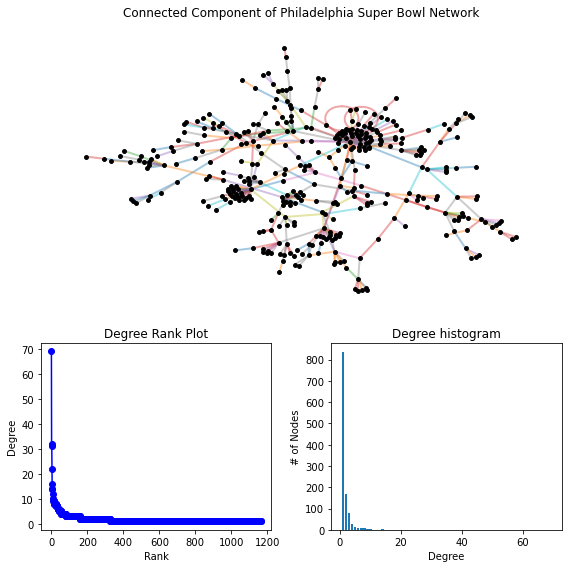

In [38]:
#code adapted from network x: 
#https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html
    
degree_sequence = sorted((d for n, d in G_sup_d.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_sup.subgraph(sorted(nx.connected_components(G_sup), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=7)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=15, node_color = 'black')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4, edge_color=riot_philadelphia_superbowl_df['Color'], width = 2)
ax0.set_title("Connected Component of Philadelphia Super Bowl Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [18]:
df_high_arousal_philly = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Anger') | (riot_philadelphia_superbowl_df['Emotion'] == 'Anticipation') | (riot_philadelphia_superbowl_df['Emotion'] == 'Fear') | (riot_philadelphia_superbowl_df['Emotion'] == 'Surprise')]
df_low_arousal_philly = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Sadness') | (riot_philadelphia_superbowl_df['Emotion'] == 'Trust') | (riot_philadelphia_superbowl_df['Emotion'] == 'Joy') | (riot_philadelphia_superbowl_df['Emotion'] == 'Disgust') | (riot_philadelphia_superbowl_df['Emotion'] == 'neutral')]


df_high_misery_philly = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Anger') | (riot_philadelphia_superbowl_df['Emotion'] == 'Fear') | (riot_philadelphia_superbowl_df['Emotion'] == 'Sadness') | (riot_philadelphia_superbowl_df['Emotion'] == 'Disgust')]
df_low_misery_philly = riot_philadelphia_superbowl_df.loc[(riot_philadelphia_superbowl_df['Emotion'] == 'Trust') | (riot_philadelphia_superbowl_df['Emotion'] == 'Joy') | (riot_philadelphia_superbowl_df['Emotion'] == 'Anticipation') | (riot_philadelphia_superbowl_df['Emotion'] == 'Surprise') | (riot_philadelphia_superbowl_df['Emotion'] == 'neutral')]

In [24]:
G_ha_philly = nx.from_pandas_edgelist(df_high_arousal_philly, source = 'Source', target = 'Target')
G_la_philly = nx.from_pandas_edgelist(df_low_arousal_philly, source = 'Source', target = 'Target')
G_hm_philly = nx.from_pandas_edgelist(df_high_misery_philly, source = 'Source', target = 'Target')
G_lm_philly = nx.from_pandas_edgelist(df_low_misery_philly, source = 'Source', target = 'Target')

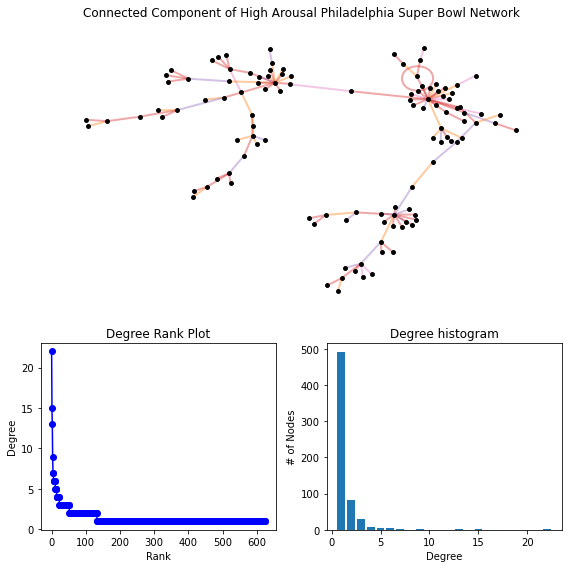

In [36]:
#code from network x
degree_sequence = sorted((d for n, d in G_ha_philly.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_ha_philly.subgraph(sorted(nx.connected_components(G_ha_philly), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=7)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=15, node_color = 'black')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4, edge_color=df_high_arousal_philly['Color'], width = 2)
ax0.set_title("Connected Component of High Arousal Philadelphia Super Bowl Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

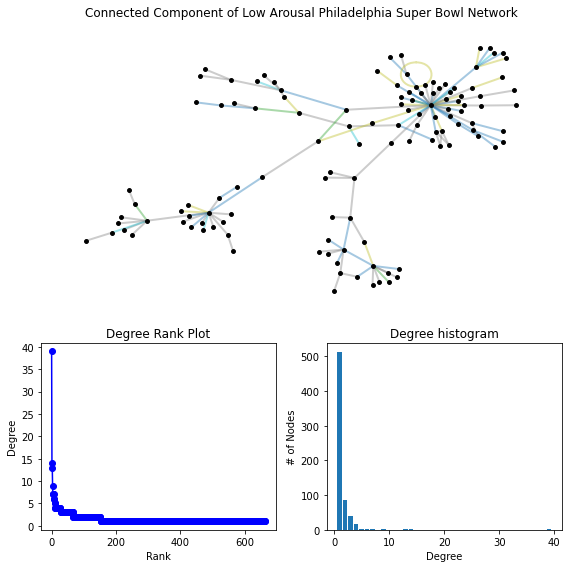

In [33]:
#code from network x
degree_sequence = sorted((d for n, d in G_la_philly.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_la_philly.subgraph(sorted(nx.connected_components(G_la_philly), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=7)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=15, node_color = 'black')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4, edge_color=df_low_arousal_philly['Color'], width = 2)
ax0.set_title("Connected Component of Low Arousal Philadelphia Super Bowl Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

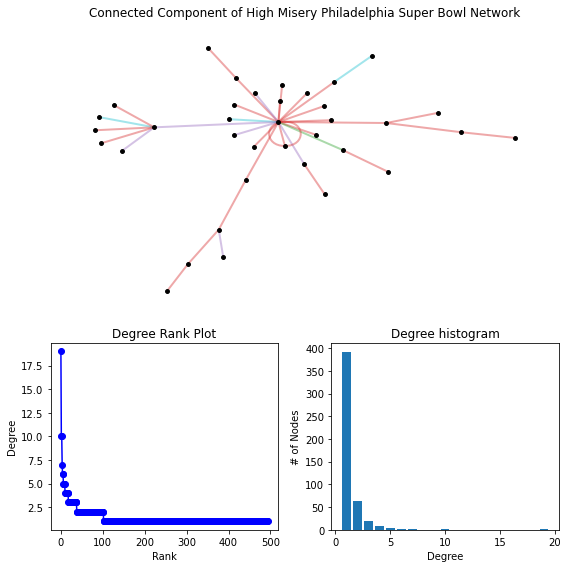

In [34]:
#code from network x
degree_sequence = sorted((d for n, d in G_hm_philly.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_hm_philly.subgraph(sorted(nx.connected_components(G_hm_philly), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=7)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=15, node_color = 'black')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4, edge_color=df_high_misery_philly['Color'], width = 2)
ax0.set_title("Connected Component of High Misery Philadelphia Super Bowl Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

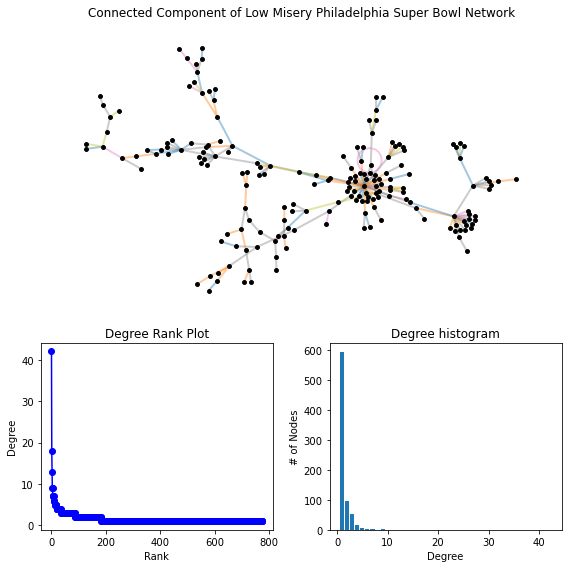

In [35]:
#code from network x
degree_sequence = sorted((d for n, d in G_lm_philly.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_lm_philly.subgraph(sorted(nx.connected_components(G_lm_philly), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=7)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=15, node_color = 'black')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4, edge_color=df_low_misery_philly['Color'], width = 2)
ax0.set_title("Connected Component of Low Misery Philadelphia Super Bowl Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

# Emotion Frequencies

In [10]:
from collections import Counter

In [11]:
emotion_tally = Counter(riot_philadelphia_superbowl_df['Emotion'])
emotion_tally

Counter({'Anger': 223,
         'Fear': 81,
         'Surprise': 30,
         'Joy': 42,
         'neutral': 284,
         'Sadness': 30,
         'Trust': 163,
         'Disgust': 37,
         'Anticipation': 132})

In [12]:
riot_philadelphia_superbowl_df.insert(5, 'Day', 1)

In [13]:
riot_philadelphia_superbowl_df

Unnamed: 0                                             Source  \
0         210977  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
1         210978  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
2         210979  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
3         210980  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
4         210981  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
...          ...                                                ...   
1017      211994  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1018      211995  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1019      211996  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1020      211997  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1021      211998  89647023735340bdff9a8c5d222f2d28197b05f6996446...   

                                                 Target Emotion   Timestamp  \
0     24680bba6628fe320ab162aed12f99c2df89a6c67976d8...   Anger  2018-02-04   
1     4b19da469528e096da234c9d36f5e8759ae6af3076b0ab...   Anger  2018-02-04   
2     588cca59fdc58d5ebb3ab21e0748ce7a96927ac67aec3d...   Anger  2018-02-04   
3     45afeec9161994ad2dd982a3aa553fed2cd16fb10fae34...   Anger  2018-02-04   
4     04f687d115b133db092102da1a05f4acd75cabb9bc18f0...   Anger  2018-02-04   
...                                                 ...     ...         ...   
1017  3a4d3f988901f502b44f63bbe31821650729a18389349b...   Trust  2018-02-10   
1018  725daf6626f8428235c06dabc0976abfd8b3ae29a9de15...   Trust  2018-02-10   
1019  8a49b6b3540be495e9764130677c35d765da59fd893d23...   Trust  2018-02-10   
1020  bec926830b6b498e719878a7af72f83d7019f14db2dc80...   Trust  2018-02-10   
1021  196de2870ef56b723014fe5d6cbed0393b6f4297f6339b...   Trust  2018-02-10   

      Day                        Event    Color  
0       1  riot_philadelphia_superbowl  #d62728  
1       1  riot_philadelphia_superbowl  #d62728  
2       1  riot_philadelphia_superbowl  #d62728  
3       1  riot_philadelphia_superbowl  #d62728  
4       1  riot_philadelphia_superbowl  #d62728  
...   ...                          ...      ...  
1017    1  riot_philadelphia_superbowl  #1f77b4  
1018    1  riot_philadelphia_superbowl  #1f77b4  
1019    1  riot_philadelphia_superbowl  #1f77b4  
1020    1  riot_philadelphia_superbowl  #1f77b4  
1021    1  riot_philadelphia_superbowl  #1f77b4  

[1022 rows x 8 columns]

In [14]:
for i in range(len(riot_philadelphia_superbowl_df)):
    if riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-05': riot_philadelphia_superbowl_df.at[i,'Day'] = 2
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-06': riot_philadelphia_superbowl_df.at[i,'Day'] = 3
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-07': riot_philadelphia_superbowl_df.at[i,'Day'] = 4
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-08': riot_philadelphia_superbowl_df.at[i,'Day'] = 5
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-09': riot_philadelphia_superbowl_df.at[i,'Day'] = 6
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-10': riot_philadelphia_superbowl_df.at[i,'Day'] = 7

In [15]:
riot_philadelphia_superbowl_df.insert(5, 'Day_Color', '#3c0791')

In [16]:
for i in range(len(riot_philadelphia_superbowl_df)):
    if riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-05': riot_philadelphia_superbowl_df.at[i,'Day_Color'] = '#845EC2'
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-06': riot_philadelphia_superbowl_df.at[i,'Day_Color'] = '#D65DB1'
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-07': riot_philadelphia_superbowl_df.at[i,'Day_Color'] = '#FF6F91'
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-08': riot_philadelphia_superbowl_df.at[i,'Day_Color'] = '#FF9671'
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-09': riot_philadelphia_superbowl_df.at[i,'Day_Color'] = '#FFC75F'
    elif riot_philadelphia_superbowl_df['Timestamp'].iloc[i] == '2018-02-10': riot_philadelphia_superbowl_df.at[i,'Day_Color'] = '#F9F871'

In [17]:
#daily dataframes - put in loop instead!
philly_day1 = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Timestamp'] == '2018-02-04']
philly_day2 = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Timestamp'] == '2018-02-05']
philly_day3 = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Timestamp'] == '2018-02-06']
philly_day4 = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Timestamp'] == '2018-02-07']
philly_day5 = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Timestamp'] == '2018-02-08']
philly_day6 = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Timestamp'] == '2018-02-09']
philly_day7 = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Timestamp'] == '2018-02-10']
philly_day1

#?? QUESTION - IS ANGER OFTEN THE INITIAL EMOTION? THE EARLY ADOPTERS?

Unnamed: 0                                             Source  \
0      210977  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
1      210978  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
2      210979  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
3      210980  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
4      210981  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   

                                              Target Emotion   Timestamp  \
0  24680bba6628fe320ab162aed12f99c2df89a6c67976d8...   Anger  2018-02-04   
1  4b19da469528e096da234c9d36f5e8759ae6af3076b0ab...   Anger  2018-02-04   
2  588cca59fdc58d5ebb3ab21e0748ce7a96927ac67aec3d...   Anger  2018-02-04   
3  45afeec9161994ad2dd982a3aa553fed2cd16fb10fae34...   Anger  2018-02-04   
4  04f687d115b133db092102da1a05f4acd75cabb9bc18f0...   Anger  2018-02-04   

  Day_Color  Day                        Event    Color  
0   #3c0791    1  riot_philadelphia_superbowl  #d62728  
1   #3c0791    1  riot_philadelphia_superbowl  #d62728  
2   #3c0791    1  riot_philadelphia_superbowl  #d62728  
3   #3c0791    1  riot_philadelphia_superbowl  #d62728  
4   #3c0791    1  riot_philadelphia_superbowl  #d62728

In [18]:
#USE COUNTER!!
Counter(philly_day1['Emotion'])['Sadness']

0

In [19]:
Counter(philly_day2['Emotion'])

Counter({'Anger': 168,
         'Fear': 71,
         'Surprise': 28,
         'neutral': 239,
         'Sadness': 26,
         'Trust': 131,
         'Disgust': 33,
         'Anticipation': 107,
         'Joy': 34})

In [20]:
df_freq = pd.DataFrame()

#SORT CHRONOLOGICALLY
df_freq['Date'] = riot_philadelphia_superbowl_df['Timestamp'].unique()
df_freq['Date'] = pd.to_datetime(df_freq['Date'])
df_freq = df_freq.sort_values(by='Date')
df_freq

Date
0 2018-02-04
1 2018-02-05
2 2018-02-06
4 2018-02-07
5 2018-02-08
3 2018-02-09
6 2018-02-10

In [21]:
df_freq['Anger'] = [0, 0, 0, 0, 0, 0, 0]
df_freq['Anticipation'] = [0, 0, 0, 0, 0, 0, 0]
df_freq['Disgust'] = [0, 0, 0, 0, 0, 0, 0]
df_freq['Fear'] = [0, 0, 0, 0, 0, 0, 0]
df_freq['Joy'] = [0, 0, 0, 0, 0, 0, 0]
df_freq['Sadness'] = [0, 0, 0, 0, 0, 0, 0]
df_freq['Surprise'] = [0, 0, 0, 0, 0, 0, 0]
df_freq['Trust'] = [0, 0, 0, 0, 0, 0, 0]
df_freq['Neutral'] = [0, 0, 0, 0, 0, 0, 0]

#rewrite zeros with appropriate counts

#day 1
df_freq.iloc[0, 1] = Counter(philly_day1['Emotion'])['Anger']

#day 2
df_freq.iloc[1, 1] = Counter(philly_day2['Emotion'])['Anger']
df_freq.iloc[1, 2] = Counter(philly_day2['Emotion'])['Anticipation']
df_freq.iloc[1, 3] = Counter(philly_day2['Emotion'])['Disgust']
df_freq.iloc[1, 4] = Counter(philly_day2['Emotion'])['Fear']
df_freq.iloc[1, 5] = Counter(philly_day2['Emotion'])['Joy']
df_freq.iloc[1, 6] = Counter(philly_day2['Emotion'])['Sadness']
df_freq.iloc[1, 7] = Counter(philly_day2['Emotion'])['Surprise']
df_freq.iloc[1, 8] = Counter(philly_day2['Emotion'])['Trust']
df_freq.iloc[1, 9] = Counter(philly_day2['Emotion'])['neutral']

#day 3
df_freq.iloc[2, 1] = Counter(philly_day3['Emotion'])['Anger']
df_freq.iloc[2, 2] = Counter(philly_day3['Emotion'])['Anticipation']
df_freq.iloc[2, 3] = Counter(philly_day3['Emotion'])['Disgust']
df_freq.iloc[2, 4] = Counter(philly_day3['Emotion'])['Fear']
df_freq.iloc[2, 5] = Counter(philly_day3['Emotion'])['Joy']
df_freq.iloc[2, 6] = Counter(philly_day3['Emotion'])['Sadness']
df_freq.iloc[2, 7] = Counter(philly_day3['Emotion'])['Surprise']
df_freq.iloc[2, 8] = Counter(philly_day3['Emotion'])['Trust']
df_freq.iloc[2, 9] = Counter(philly_day3['Emotion'])['neutral']

#day 4
df_freq.iloc[3, 1] = Counter(philly_day4['Emotion'])['Anger']
df_freq.iloc[3, 2] = Counter(philly_day4['Emotion'])['Anticipation']
df_freq.iloc[3, 3] = Counter(philly_day4['Emotion'])['Disgust']
df_freq.iloc[3, 4] = Counter(philly_day4['Emotion'])['Fear']
df_freq.iloc[3, 5] = Counter(philly_day4['Emotion'])['Joy']
df_freq.iloc[3, 6] = Counter(philly_day4['Emotion'])['Sadness']
df_freq.iloc[3, 7] = Counter(philly_day4['Emotion'])['Surprise']
df_freq.iloc[3, 8] = Counter(philly_day4['Emotion'])['Trust']
df_freq.iloc[3, 9] = Counter(philly_day4['Emotion'])['neutral']

#day 5
df_freq.iloc[4, 1] = Counter(philly_day5['Emotion'])['Anger']
df_freq.iloc[4, 2] = Counter(philly_day5['Emotion'])['Anticipation']
df_freq.iloc[4, 3] = Counter(philly_day5['Emotion'])['Disgust']
df_freq.iloc[4, 4] = Counter(philly_day5['Emotion'])['Fear']
df_freq.iloc[4, 5] = Counter(philly_day5['Emotion'])['Joy']
df_freq.iloc[4, 6] = Counter(philly_day5['Emotion'])['Sadness']
df_freq.iloc[4, 7] = Counter(philly_day5['Emotion'])['Surprise']
df_freq.iloc[4, 8] = Counter(philly_day5['Emotion'])['Trust']
df_freq.iloc[4, 9] = Counter(philly_day5['Emotion'])['neutral']

#day 6
df_freq.iloc[5, 1] = Counter(philly_day6['Emotion'])['Anger']
df_freq.iloc[5, 2] = Counter(philly_day6['Emotion'])['Anticipation']
df_freq.iloc[5, 3] = Counter(philly_day6['Emotion'])['Disgust']
df_freq.iloc[5, 4] = Counter(philly_day6['Emotion'])['Fear']
df_freq.iloc[5, 5] = Counter(philly_day6['Emotion'])['Joy']
df_freq.iloc[5, 6] = Counter(philly_day6['Emotion'])['Sadness']
df_freq.iloc[5, 7] = Counter(philly_day6['Emotion'])['Surprise']
df_freq.iloc[5, 8] = Counter(philly_day6['Emotion'])['Trust']
df_freq.iloc[5, 9] = Counter(philly_day6['Emotion'])['neutral']

#day 7 
df_freq.iloc[6, 1] = Counter(philly_day7['Emotion'])['Anger']
df_freq.iloc[6, 2] = Counter(philly_day7['Emotion'])['Anticipation']
df_freq.iloc[6, 3] = Counter(philly_day7['Emotion'])['Disgust']
df_freq.iloc[6, 4] = Counter(philly_day7['Emotion'])['Fear']
df_freq.iloc[6, 5] = Counter(philly_day7['Emotion'])['Joy']
df_freq.iloc[6, 6] = Counter(philly_day7['Emotion'])['Sadness']
df_freq.iloc[6, 7] = Counter(philly_day7['Emotion'])['Surprise']
df_freq.iloc[6, 8] = Counter(philly_day7['Emotion'])['Trust']
df_freq.iloc[6, 9] = Counter(philly_day7['Emotion'])['neutral']


df_freq

Date  Anger  Anticipation  Disgust  Fear  Joy  Sadness  Surprise  \
0 2018-02-04      5             0        0     0    0        0         0   
1 2018-02-05    168           107       33    71   34       26        28   
2 2018-02-06     25            14        0     6    5        3         2   
4 2018-02-07      9             6        0     0    0        0         0   
5 2018-02-08      7             4        3     2    0        0         0   
3 2018-02-09      9             0        1     2    3        0         0   
6 2018-02-10      0             1        0     0    0        1         0   

   Trust  Neutral  
0      0        0  
1    131      239  
2     15       12  
4      3       10  
5      8        6  
3      0       17  
6      6        0

In [22]:
df_freq.set_index('Date')

Anger  Anticipation  Disgust  Fear  Joy  Sadness  Surprise  Trust  \
Date                                                                            
2018-02-04      5             0        0     0    0        0         0      0   
2018-02-05    168           107       33    71   34       26        28    131   
2018-02-06     25            14        0     6    5        3         2     15   
2018-02-07      9             6        0     0    0        0         0      3   
2018-02-08      7             4        3     2    0        0         0      8   
2018-02-09      9             0        1     2    3        0         0      0   
2018-02-10      0             1        0     0    0        1         0      6   

            Neutral  
Date                 
2018-02-04        0  
2018-02-05      239  
2018-02-06       12  
2018-02-07       10  
2018-02-08        6  
2018-02-09       17  
2018-02-10        0

<AxesSubplot:xlabel='Date'>

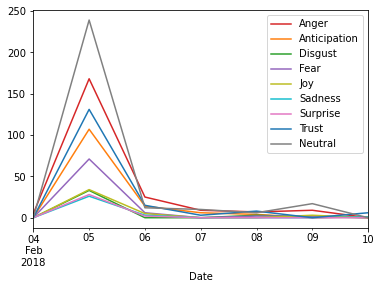

In [23]:
ax = plt.gca() 
  
#use plot() method on the dataframe 
df_freq.plot( x = 'Date' , y = 'Anger', color = '#d62728', ax = ax) 
df_freq.plot( x = 'Date' , y = 'Anticipation', color = '#ff7f0e', ax = ax) 
df_freq.plot( x = 'Date' , y = 'Disgust', color = '#2ca02c', ax = ax) 
df_freq.plot( x = 'Date' , y = 'Fear',color = '#9467bd', ax = ax) 
df_freq.plot( x = 'Date' , y = 'Joy', color = '#bcbd22', ax = ax) 
df_freq.plot( x = 'Date' , y = 'Sadness',color = '#17becf', ax = ax) 
df_freq.plot( x = 'Date' , y = 'Surprise', color = '#e377c2', ax = ax) 
df_freq.plot( x = 'Date' , y = 'Trust', color = '#1f77b4', ax = ax) 
df_freq.plot( x = 'Date' , y = 'Neutral', color = 'gray', ax = ax) 

In [24]:
#as percent of total messages
df_freq_norm = df_freq
df_freq_norm['SUM'] = df_freq_norm.sum(axis=1, numeric_only=True)
df_freq_norm

Date  Anger  Anticipation  Disgust  Fear  Joy  Sadness  Surprise  \
0 2018-02-04      5             0        0     0    0        0         0   
1 2018-02-05    168           107       33    71   34       26        28   
2 2018-02-06     25            14        0     6    5        3         2   
4 2018-02-07      9             6        0     0    0        0         0   
5 2018-02-08      7             4        3     2    0        0         0   
3 2018-02-09      9             0        1     2    3        0         0   
6 2018-02-10      0             1        0     0    0        1         0   

   Trust  Neutral  SUM  
0      0        0    5  
1    131      239  837  
2     15       12   82  
4      3       10   28  
5      8        6   30  
3      0       17   32  
6      6        0    8

In [25]:
df_freq_norm[['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'Neutral']] = df_freq_norm[['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'Neutral']].div(df_freq_norm['SUM'], axis=0)
df_freq_norm

Date     Anger  Anticipation   Disgust      Fear       Joy   Sadness  \
0 2018-02-04  1.000000      0.000000  0.000000  0.000000  0.000000  0.000000   
1 2018-02-05  0.200717      0.127838  0.039427  0.084827  0.040621  0.031063   
2 2018-02-06  0.304878      0.170732  0.000000  0.073171  0.060976  0.036585   
4 2018-02-07  0.321429      0.214286  0.000000  0.000000  0.000000  0.000000   
5 2018-02-08  0.233333      0.133333  0.100000  0.066667  0.000000  0.000000   
3 2018-02-09  0.281250      0.000000  0.031250  0.062500  0.093750  0.000000   
6 2018-02-10  0.000000      0.125000  0.000000  0.000000  0.000000  0.125000   

   Surprise     Trust   Neutral  SUM  
0  0.000000  0.000000  0.000000    5  
1  0.033453  0.156511  0.285544  837  
2  0.024390  0.182927  0.146341   82  
4  0.000000  0.107143  0.357143   28  
5  0.000000  0.266667  0.200000   30  
3  0.000000  0.000000  0.531250   32  
6  0.000000  0.750000  0.000000    8

<AxesSubplot:xlabel='Date'>

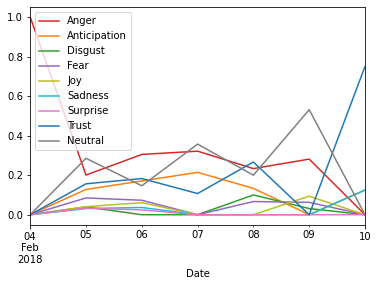

In [26]:
ax = plt.gca() 
  
#use plot() method on the dataframe 
df_freq_norm.plot( x = 'Date' , y = 'Anger', color = '#d62728', ax = ax) 
df_freq_norm.plot( x = 'Date' , y = 'Anticipation', color = '#ff7f0e', ax = ax) 
df_freq_norm.plot( x = 'Date' , y = 'Disgust', color = '#2ca02c', ax = ax) 
df_freq_norm.plot( x = 'Date' , y = 'Fear',color = '#9467bd', ax = ax) 
df_freq_norm.plot( x = 'Date' , y = 'Joy', color = '#bcbd22', ax = ax) 
df_freq_norm.plot( x = 'Date' , y = 'Sadness',color = '#17becf', ax = ax) 
df_freq_norm.plot( x = 'Date' , y = 'Surprise', color = '#e377c2', ax = ax) 
df_freq_norm.plot( x = 'Date' , y = 'Trust', color = '#1f77b4', ax = ax) 
df_freq_norm.plot( x = 'Date' , y = 'Neutral', color = 'gray', ax = ax) 

# Emotion Specific Networks

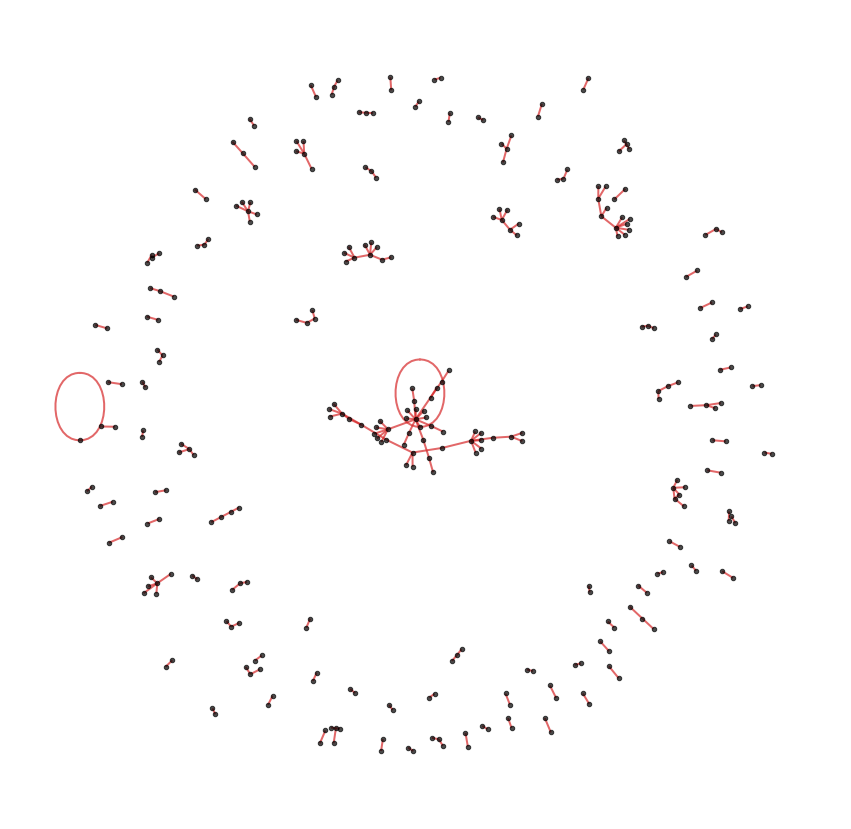

In [13]:
#anger subplot
#Superbowl Network
riot_philadelphia_superbowl_df_anger = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Emotion'] == 'Anger']

fig, ax = plt.subplots(figsize=(15,15))

G_sup_anger = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_anger, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_anger, seed=7)
nx.draw(G_sup_anger, pos, edge_color=riot_philadelphia_superbowl_df_anger['Color'], width = 2, node_color = 'black', alpha=0.7, node_size = 20)
plt.show()

In [42]:
G_sup_anger = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_anger, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())
G_sup_trust = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_trust, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
G_sup_neut = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_neutral, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
G_sup_ant = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_anticipation, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
G_sup_fear = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_fear, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
G_sup_joy = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_joy, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
G_sup_dis = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_dis, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
G_sup_sad = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_sad, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
G_sup_surp = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_surp, source = 'Source', target = 'Target',create_using=nx.MultiDiGraph())
G_sup = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df, source = 'Source', target = 'Target', create_using=nx.MultiDiGraph())

print('overall reciprocity ' + str(nx.overall_reciprocity(G_sup)))
print('anger reciprocity ' + str(nx.overall_reciprocity(G_sup_anger)))
print('trust reciprocity ' + str(nx.overall_reciprocity(G_sup_trust)))
print('neutral reciprocity ' + str(nx.overall_reciprocity(G_sup_neut)))
print('anticipation reciprocity ' + str(nx.overall_reciprocity(G_sup_ant)))
print('fear reciprocity ' + str(nx.overall_reciprocity(G_sup_fear)))
print('joy reciprocity ' + str(nx.overall_reciprocity(G_sup_joy)))
print('disgust reciprocity ' + str(nx.overall_reciprocity(G_sup_dis)))
print('sadness reciprocity ' + str(nx.overall_reciprocity(G_sup_sad)))
print('surprise reciprocity ' + str(nx.overall_reciprocity(G_sup_surp)))

overall reciprocity 0.003913894324853229
anger reciprocity 0.0
trust reciprocity 0.012269938650306749
neutral reciprocity 0.007042253521126761
anticipation reciprocity 0.0
fear reciprocity 0.0
joy reciprocity 0.0
disgust reciprocity 0.0
sadness reciprocity 0.0
surprise reciprocity 0.0


In [58]:
print("Number of Triangles: " + str(sum(nx.triangles(G_sup_anger).values()) / 3)) #because triangles function returns a dict!
print("Transitivity: " + str(nx.transitivity(G_sup_anger)))
print("")
print("Max Clustering Coefficient: " + str(max(nx.clustering(G_sup_anger).values())))
print("Mean Clustering Coefficient: " + str(nx.average_clustering(G_sup_anger)))
print("")
print("Max Degree Centrality: " + str(max(nx.degree_centrality(G_sup_anger).values())))
print("Max Closeness Centrality: " + str(max(nx.closeness_centrality(G_sup_anger).values())))
print("Max Eigenvector Centrality: " + str(max(nx.eigenvector_centrality(G_sup_anger).values())))
print("Max Betweenness Centrality: " + str(max(nx.betweenness_centrality(G_sup_anger).values())))
print("")
print("Mean Degree Centrality: " + str(statistics.mean(nx.degree_centrality(G_sup_anger).values())))
print("Mean Closeness Centrality: " + str(statistics.mean(nx.closeness_centrality(G_sup_anger).values())))
print("Mean Eigenvector Centrality: " + str(statistics.mean(nx.eigenvector_centrality(G_sup_anger).values())))
print("Mean Betweenness Centrality: " + str(statistics.mean(nx.betweenness_centrality(G_sup_anger).values())))

Number of Triangles: 2.0
Transitivity: 0.023346303501945526

Max Clustering Coefficient: 1.0
Mean Clustering Coefficient: 0.009401709401709403

Max Degree Centrality: 0.03858520900321544
Max Closeness Centrality: 0.050241157556270094
Max Eigenvector Centrality: 0.6645209352371957
Max Betweenness Centrality: 0.0056633129343429105

Mean Degree Centrality: 0.004410915986478687
Mean Closeness Centrality: 0.008161982938841367
Mean Eigenvector Centrality: 0.012400461345810717
Mean Betweenness Centrality: 0.00010033271365083418


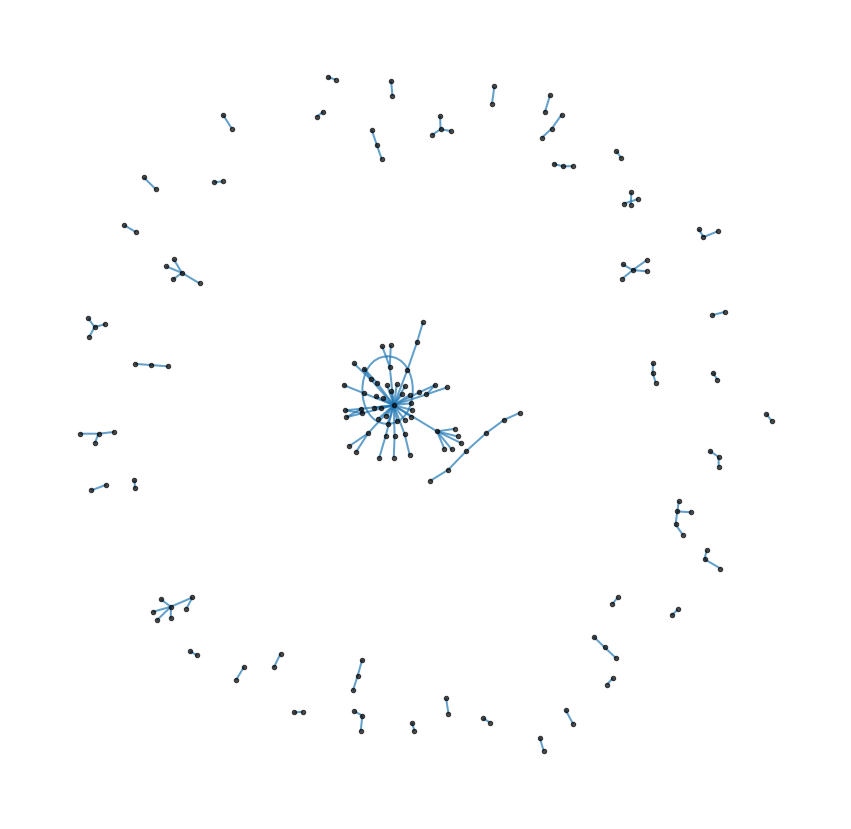

In [15]:
riot_philadelphia_superbowl_df_trust = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Emotion'] == 'Trust']

fig, ax = plt.subplots(figsize=(15,15))

G_sup_trust = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_trust, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_trust, seed=7)
nx.draw(G_sup_trust, pos, edge_color=riot_philadelphia_superbowl_df_trust['Color'], width = 2, node_color = 'black', alpha = 0.7, node_size = 20)
plt.show()

In [60]:
print("Number of Triangles: " + str(sum(nx.triangles(G_sup_trust).values()) / 3)) #because triangles function returns a dict!
print("Transitivity: " + str(nx.transitivity(G_sup_trust)))
print("")
print("Max Clustering Coefficient: " + str(max(nx.clustering(G_sup_trust).values())))
print("Mean Clustering Coefficient: " + str(nx.average_clustering(G_sup_trust)))
print("")
print("Max Degree Centrality: " + str(max(nx.degree_centrality(G_sup_trust).values())))
print("Max Closeness Centrality: " + str(max(nx.closeness_centrality(G_sup_trust).values())))
print("Max Eigenvector Centrality: " + str(max(nx.eigenvector_centrality(G_sup_trust).values())))
print("Max Betweenness Centrality: " + str(max(nx.betweenness_centrality(G_sup_trust).values())))
print("")
print("Mean Degree Centrality: " + str(statistics.mean(nx.degree_centrality(G_sup_trust).values())))
print("Mean Closeness Centrality: " + str(statistics.mean(nx.closeness_centrality(G_sup_trust).values())))
print("Mean Eigenvector Centrality: " + str(statistics.mean(nx.eigenvector_centrality(G_sup_trust).values())))
print("Mean Betweenness Centrality: " + str(statistics.mean(nx.betweenness_centrality(G_sup_trust).values())))

Number of Triangles: 3.0
Transitivity: 0.015050167224080268

Max Clustering Coefficient: 1.0
Mean Clustering Coefficient: 0.016227114210985178

Max Degree Centrality: 0.17391304347826086
Max Closeness Centrality: 0.20355072463768117
Max Eigenvector Centrality: 0.6891918744809712
Max Betweenness Centrality: 0.07923497267759563

Mean Degree Centrality: 0.008343125734430083
Mean Closeness Centrality: 0.03819804498437283
Mean Eigenvector Centrality: 0.028429249834784
Mean Betweenness Centrality: 0.0008148561961819268


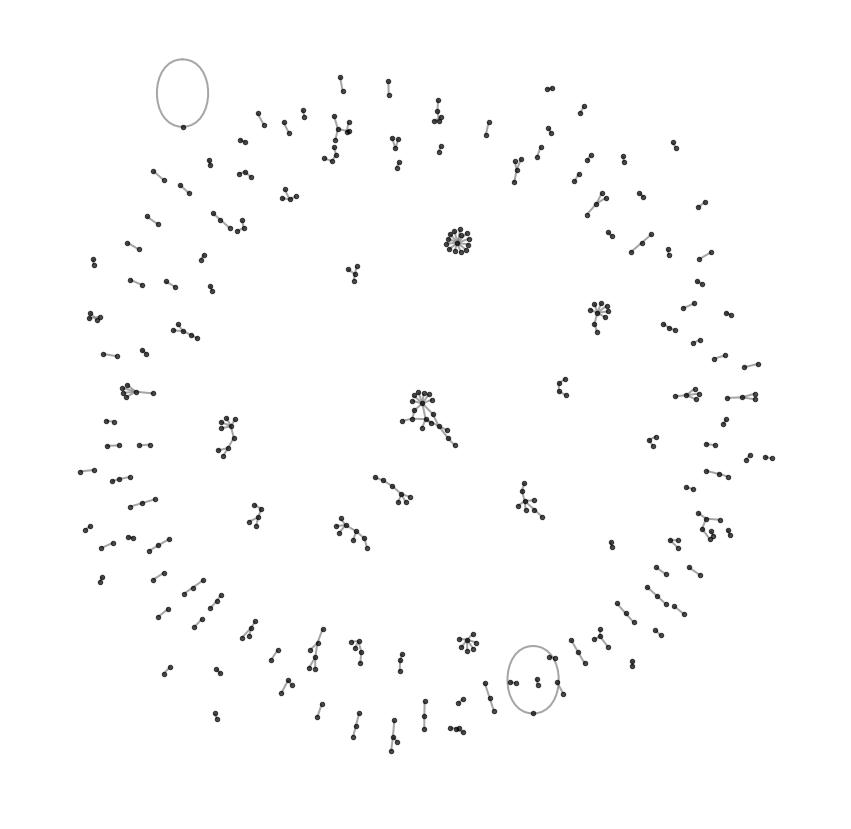

In [16]:
riot_philadelphia_superbowl_df_neutral = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Emotion'] == 'neutral']

fig, ax = plt.subplots(figsize=(15,15))

G_sup_neut = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_neutral, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_neut, seed=7)
nx.draw(G_sup_neut, pos, edge_color=riot_philadelphia_superbowl_df_neutral['Color'], width = 2, node_color = 'black', alpha = 0.7, node_size = 20)
plt.show()

In [62]:
print("Number of Triangles: " + str(sum(nx.triangles(G_sup_neut).values()) / 3)) #because triangles function returns a dict!
print("Transitivity: " + str(nx.transitivity(G_sup_neut)))
print("")
print("Max Clustering Coefficient: " + str(max(nx.clustering(G_sup_neut).values())))
print("Mean Clustering Coefficient: " + str(nx.average_clustering(G_sup_neut)))
print("")
print("Max Degree Centrality: " + str(max(nx.degree_centrality(G_sup_neut).values())))
print("Max Closeness Centrality: " + str(max(nx.closeness_centrality(G_sup_neut).values())))
print("Max Eigenvector Centrality: " + str(max(nx.eigenvector_centrality(G_sup_neut).values())))
print("Max Betweenness Centrality: " + str(max(nx.betweenness_centrality(G_sup_neut).values())))
print("")
print("Mean Degree Centrality: " + str(statistics.mean(nx.degree_centrality(G_sup_neut).values())))
print("Mean Closeness Centrality: " + str(statistics.mean(nx.closeness_centrality(G_sup_neut).values())))
print("Mean Eigenvector Centrality: " + str(statistics.mean(nx.eigenvector_centrality(G_sup_neut).values())))
print("Mean Betweenness Centrality: " + str(statistics.mean(nx.betweenness_centrality(G_sup_neut).values())))

Number of Triangles: 0.0
Transitivity: 0

Max Clustering Coefficient: 0
Mean Clustering Coefficient: 0.0

Max Degree Centrality: 0.03324808184143223
Max Closeness Centrality: 0.03324808184143223
Max Eigenvector Centrality: 0.7071059952081477
Max Betweenness Centrality: 0.0011672896583382517

Mean Degree Centrality: 0.0034579049010908715
Mean Closeness Centrality: 0.005494289762123617
Mean Eigenvector Centrality: 0.008321161989330203
Mean Betweenness Centrality: 2.1580538569943027e-05


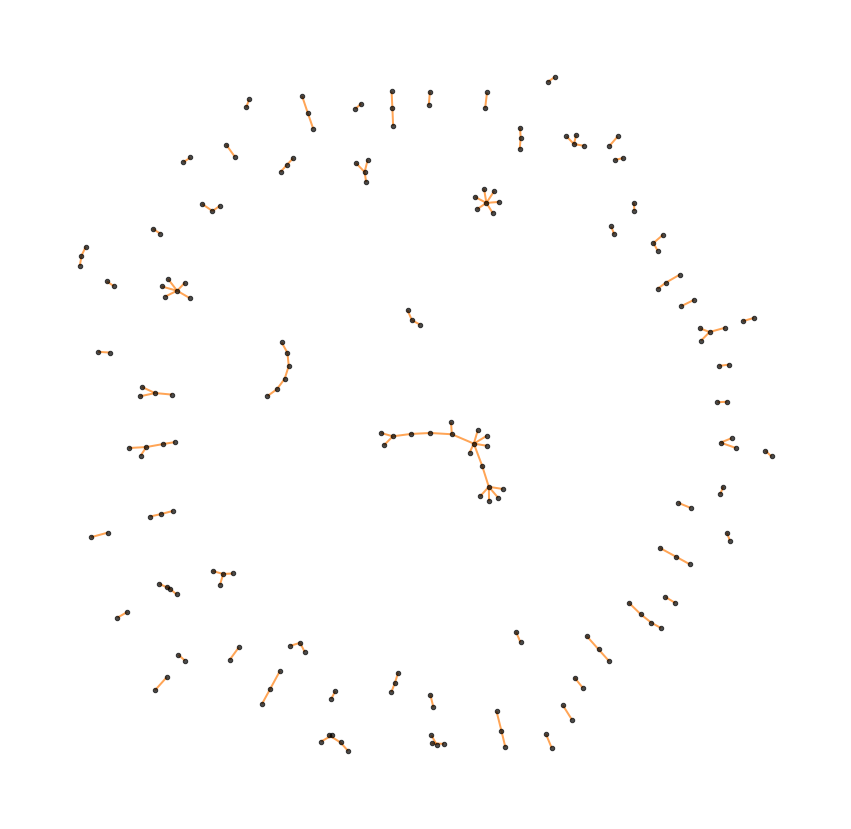

In [17]:
riot_philadelphia_superbowl_df_anticipation = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Emotion'] == 'Anticipation']

fig, ax = plt.subplots(figsize=(15,15))

G_sup_ant = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_anticipation, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_ant, seed=7)
nx.draw(G_sup_ant, pos, edge_color=riot_philadelphia_superbowl_df_anticipation['Color'], width = 2, node_color = 'black', alpha = 0.7, node_size = 20)
plt.show()

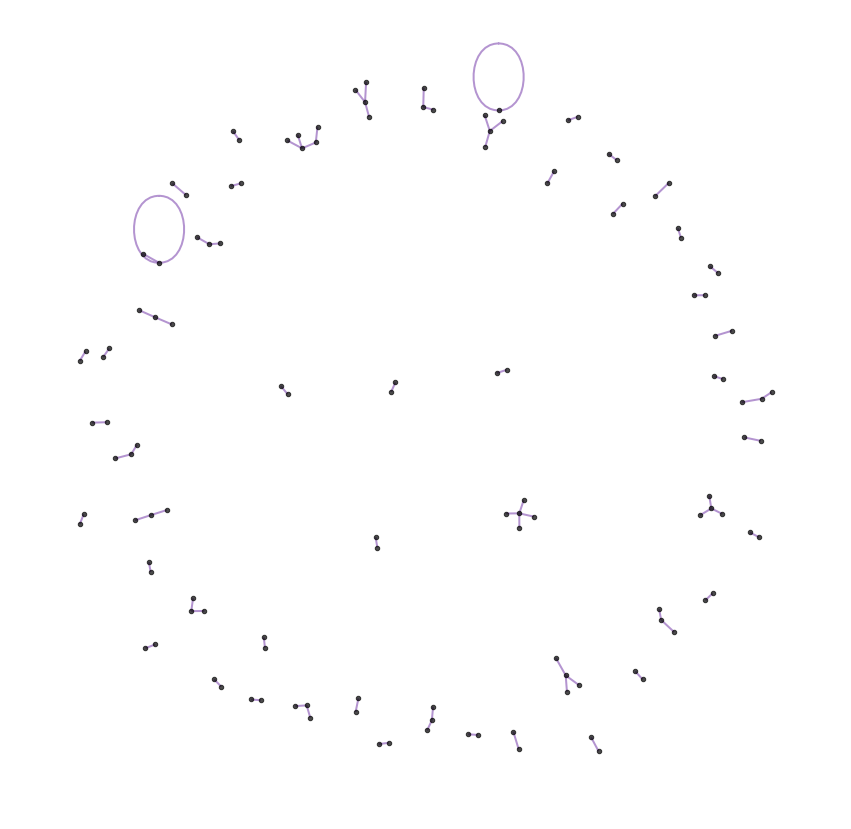

In [27]:
riot_philadelphia_superbowl_df_fear = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Emotion'] == 'Fear']

fig, ax = plt.subplots(figsize=(15,15))

G_sup_fear = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_fear, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_fear, seed=7)
nx.draw(G_sup_fear, pos, edge_color=riot_philadelphia_superbowl_df_fear['Color'], width = 2, node_color = 'black', alpha = 0.7, node_size = 20)
plt.show()

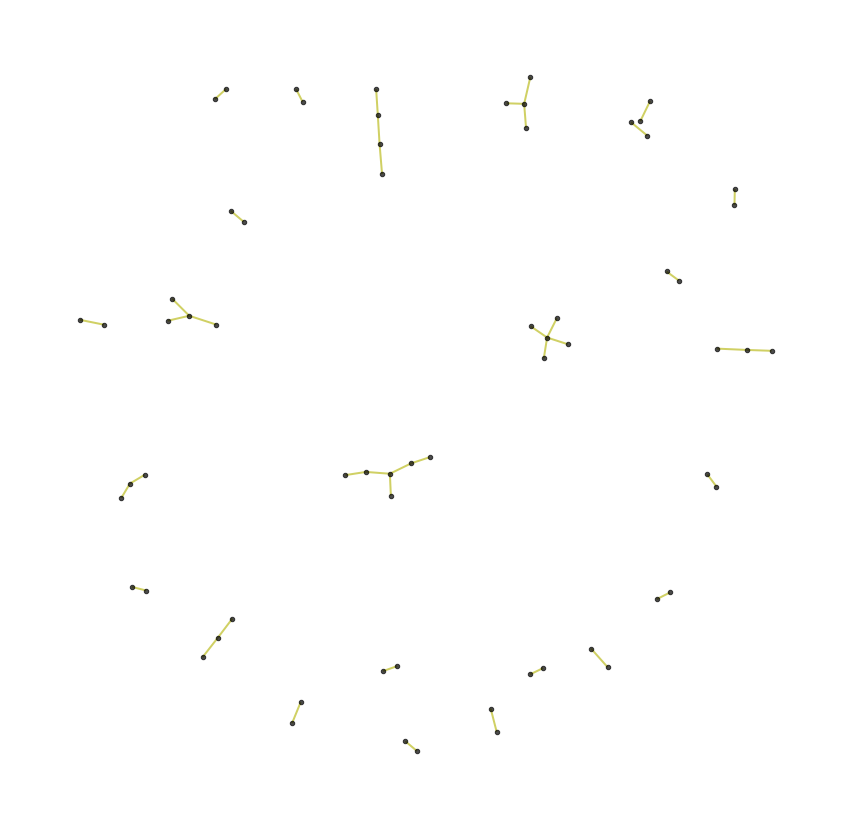

In [28]:
riot_philadelphia_superbowl_df_joy = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Emotion'] == 'Joy']

fig, ax = plt.subplots(figsize=(15,15))

G_sup_joy = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_joy, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_joy, seed=7)
nx.draw(G_sup_joy, pos, edge_color=riot_philadelphia_superbowl_df_joy['Color'], width = 2, node_color = 'black', alpha = 0.7, node_size = 20)
plt.show()

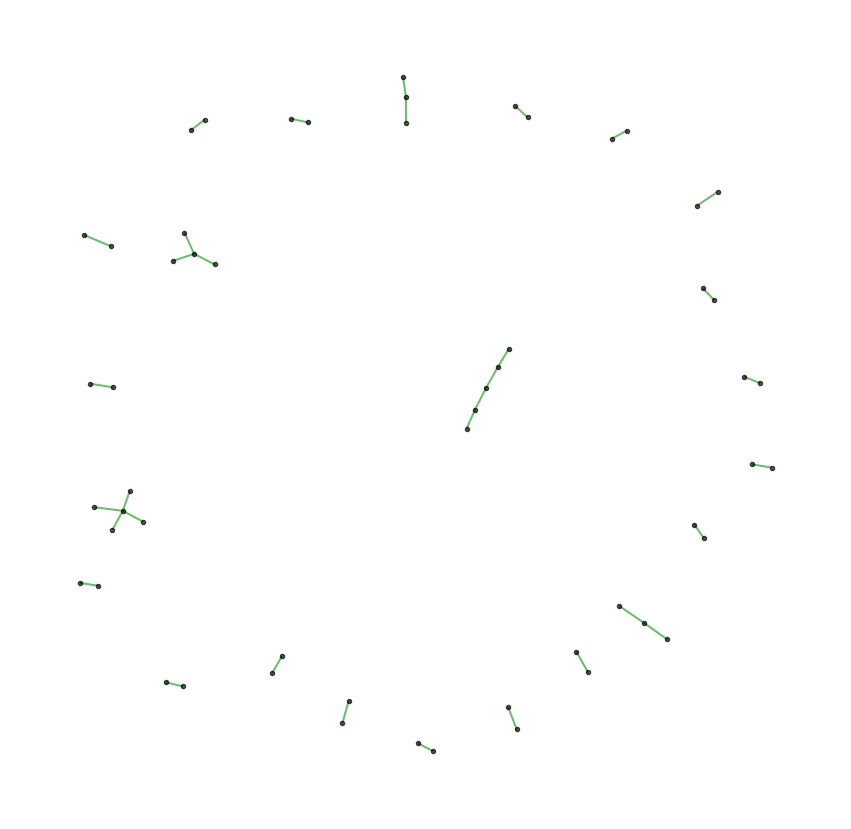

In [29]:
riot_philadelphia_superbowl_df_dis = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Emotion'] == 'Disgust']

fig, ax = plt.subplots(figsize=(15,15))

G_sup_dis = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_dis, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_dis, seed=7)
nx.draw(G_sup_dis, pos, edge_color=riot_philadelphia_superbowl_df_dis['Color'], width = 2, node_color = 'black', alpha = 0.7, node_size = 20)
plt.show()

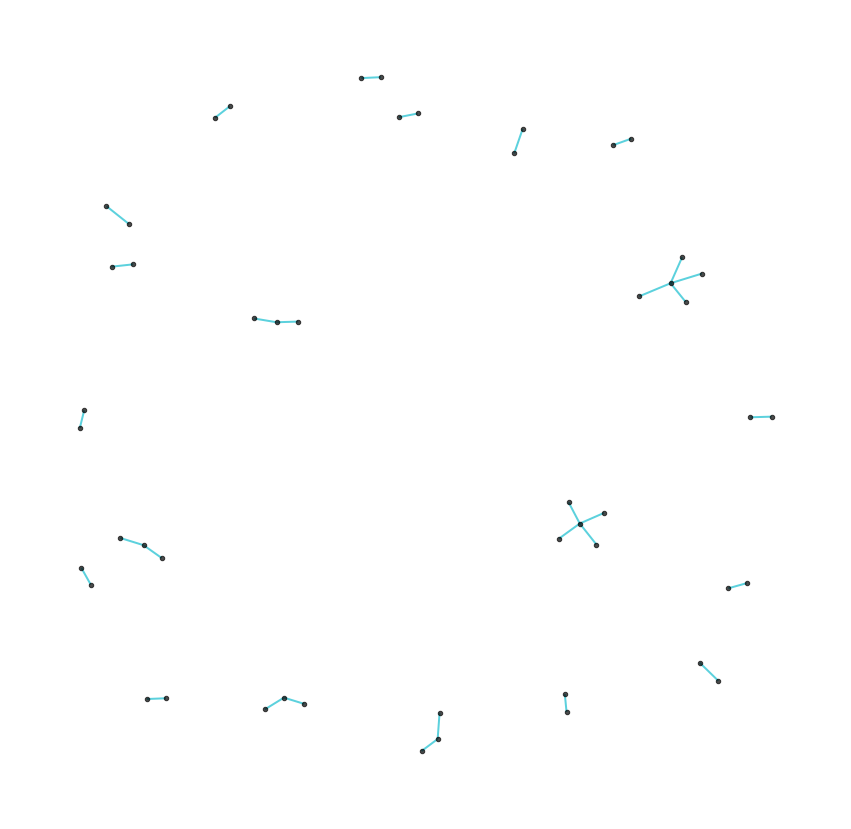

In [30]:
riot_philadelphia_superbowl_df_sad = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Emotion'] == 'Sadness']

fig, ax = plt.subplots(figsize=(15,15))

G_sup_sad = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_sad, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_sad, seed=7)
nx.draw(G_sup_sad, pos, edge_color=riot_philadelphia_superbowl_df_sad['Color'], width = 2, node_color = 'black', alpha = 0.7, node_size = 20)
plt.show()

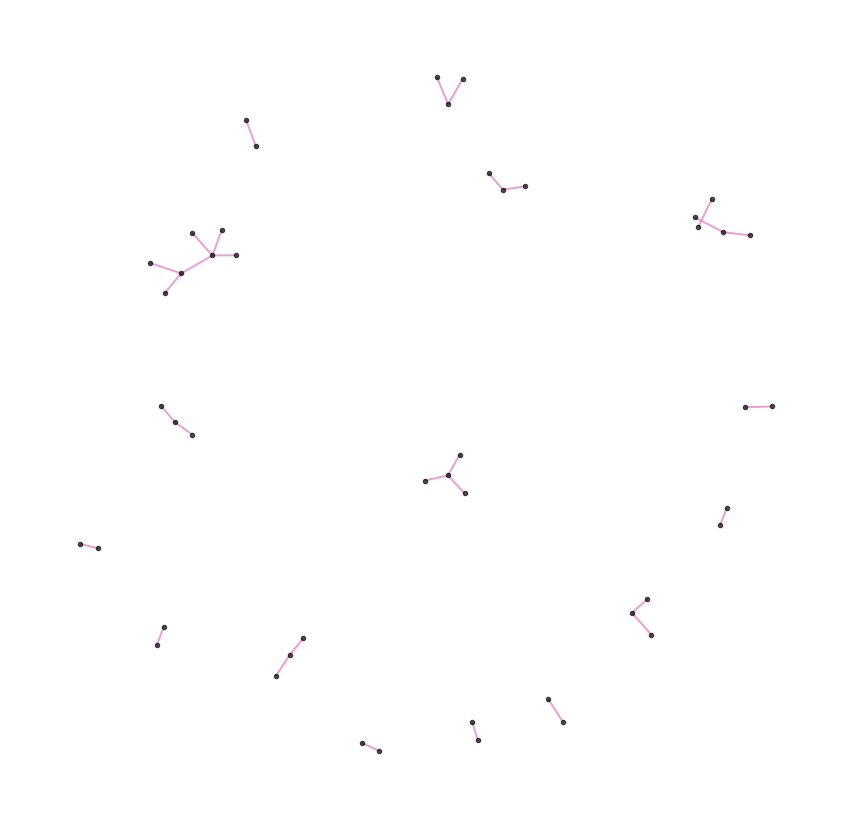

In [32]:
riot_philadelphia_superbowl_df_surp = riot_philadelphia_superbowl_df.loc[riot_philadelphia_superbowl_df['Emotion'] == 'Surprise']

fig, ax = plt.subplots(figsize=(15,15))

G_sup_surp = nx.from_pandas_edgelist(riot_philadelphia_superbowl_df_surp, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_surp, seed=7)
nx.draw(G_sup_surp, pos, edge_color=riot_philadelphia_superbowl_df_surp['Color'], width = 2, node_color = 'black', alpha = 0.7, node_size = 20)
plt.show()

## Day Specific Networks

In [28]:
#philly_day1 = day 1
philly_12 = pd.concat([philly_day1, philly_day2], ignore_index=True, axis=0)
philly_13 = pd.concat([philly_12, philly_day3], ignore_index=True, axis=0)
philly_14 = pd.concat([philly_13, philly_day4], ignore_index=True, axis=0)
philly_15 = pd.concat([philly_14, philly_day5], ignore_index=True, axis=0)
philly_16 = pd.concat([philly_15, philly_day6], ignore_index=True, axis=0)
#riot_philadelphia_superbowl_df = day 7

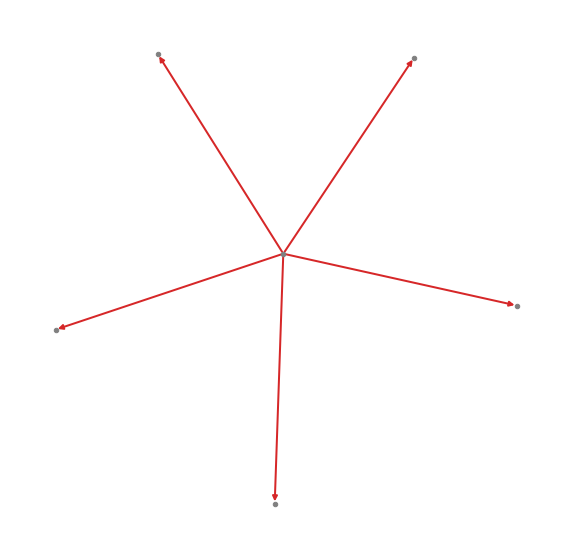

In [29]:
#philly_day1 - 7 
fig, ax = plt.subplots(figsize=(10,10))

G_sup_d1 = nx.from_pandas_edgelist(philly_day1, source = 'Source', target = 'Target', create_using=nx.DiGraph() )

pos = nx.spring_layout(G_sup_d1, seed=7)
nx.draw(G_sup_d1, pos, edge_color=philly_day1['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

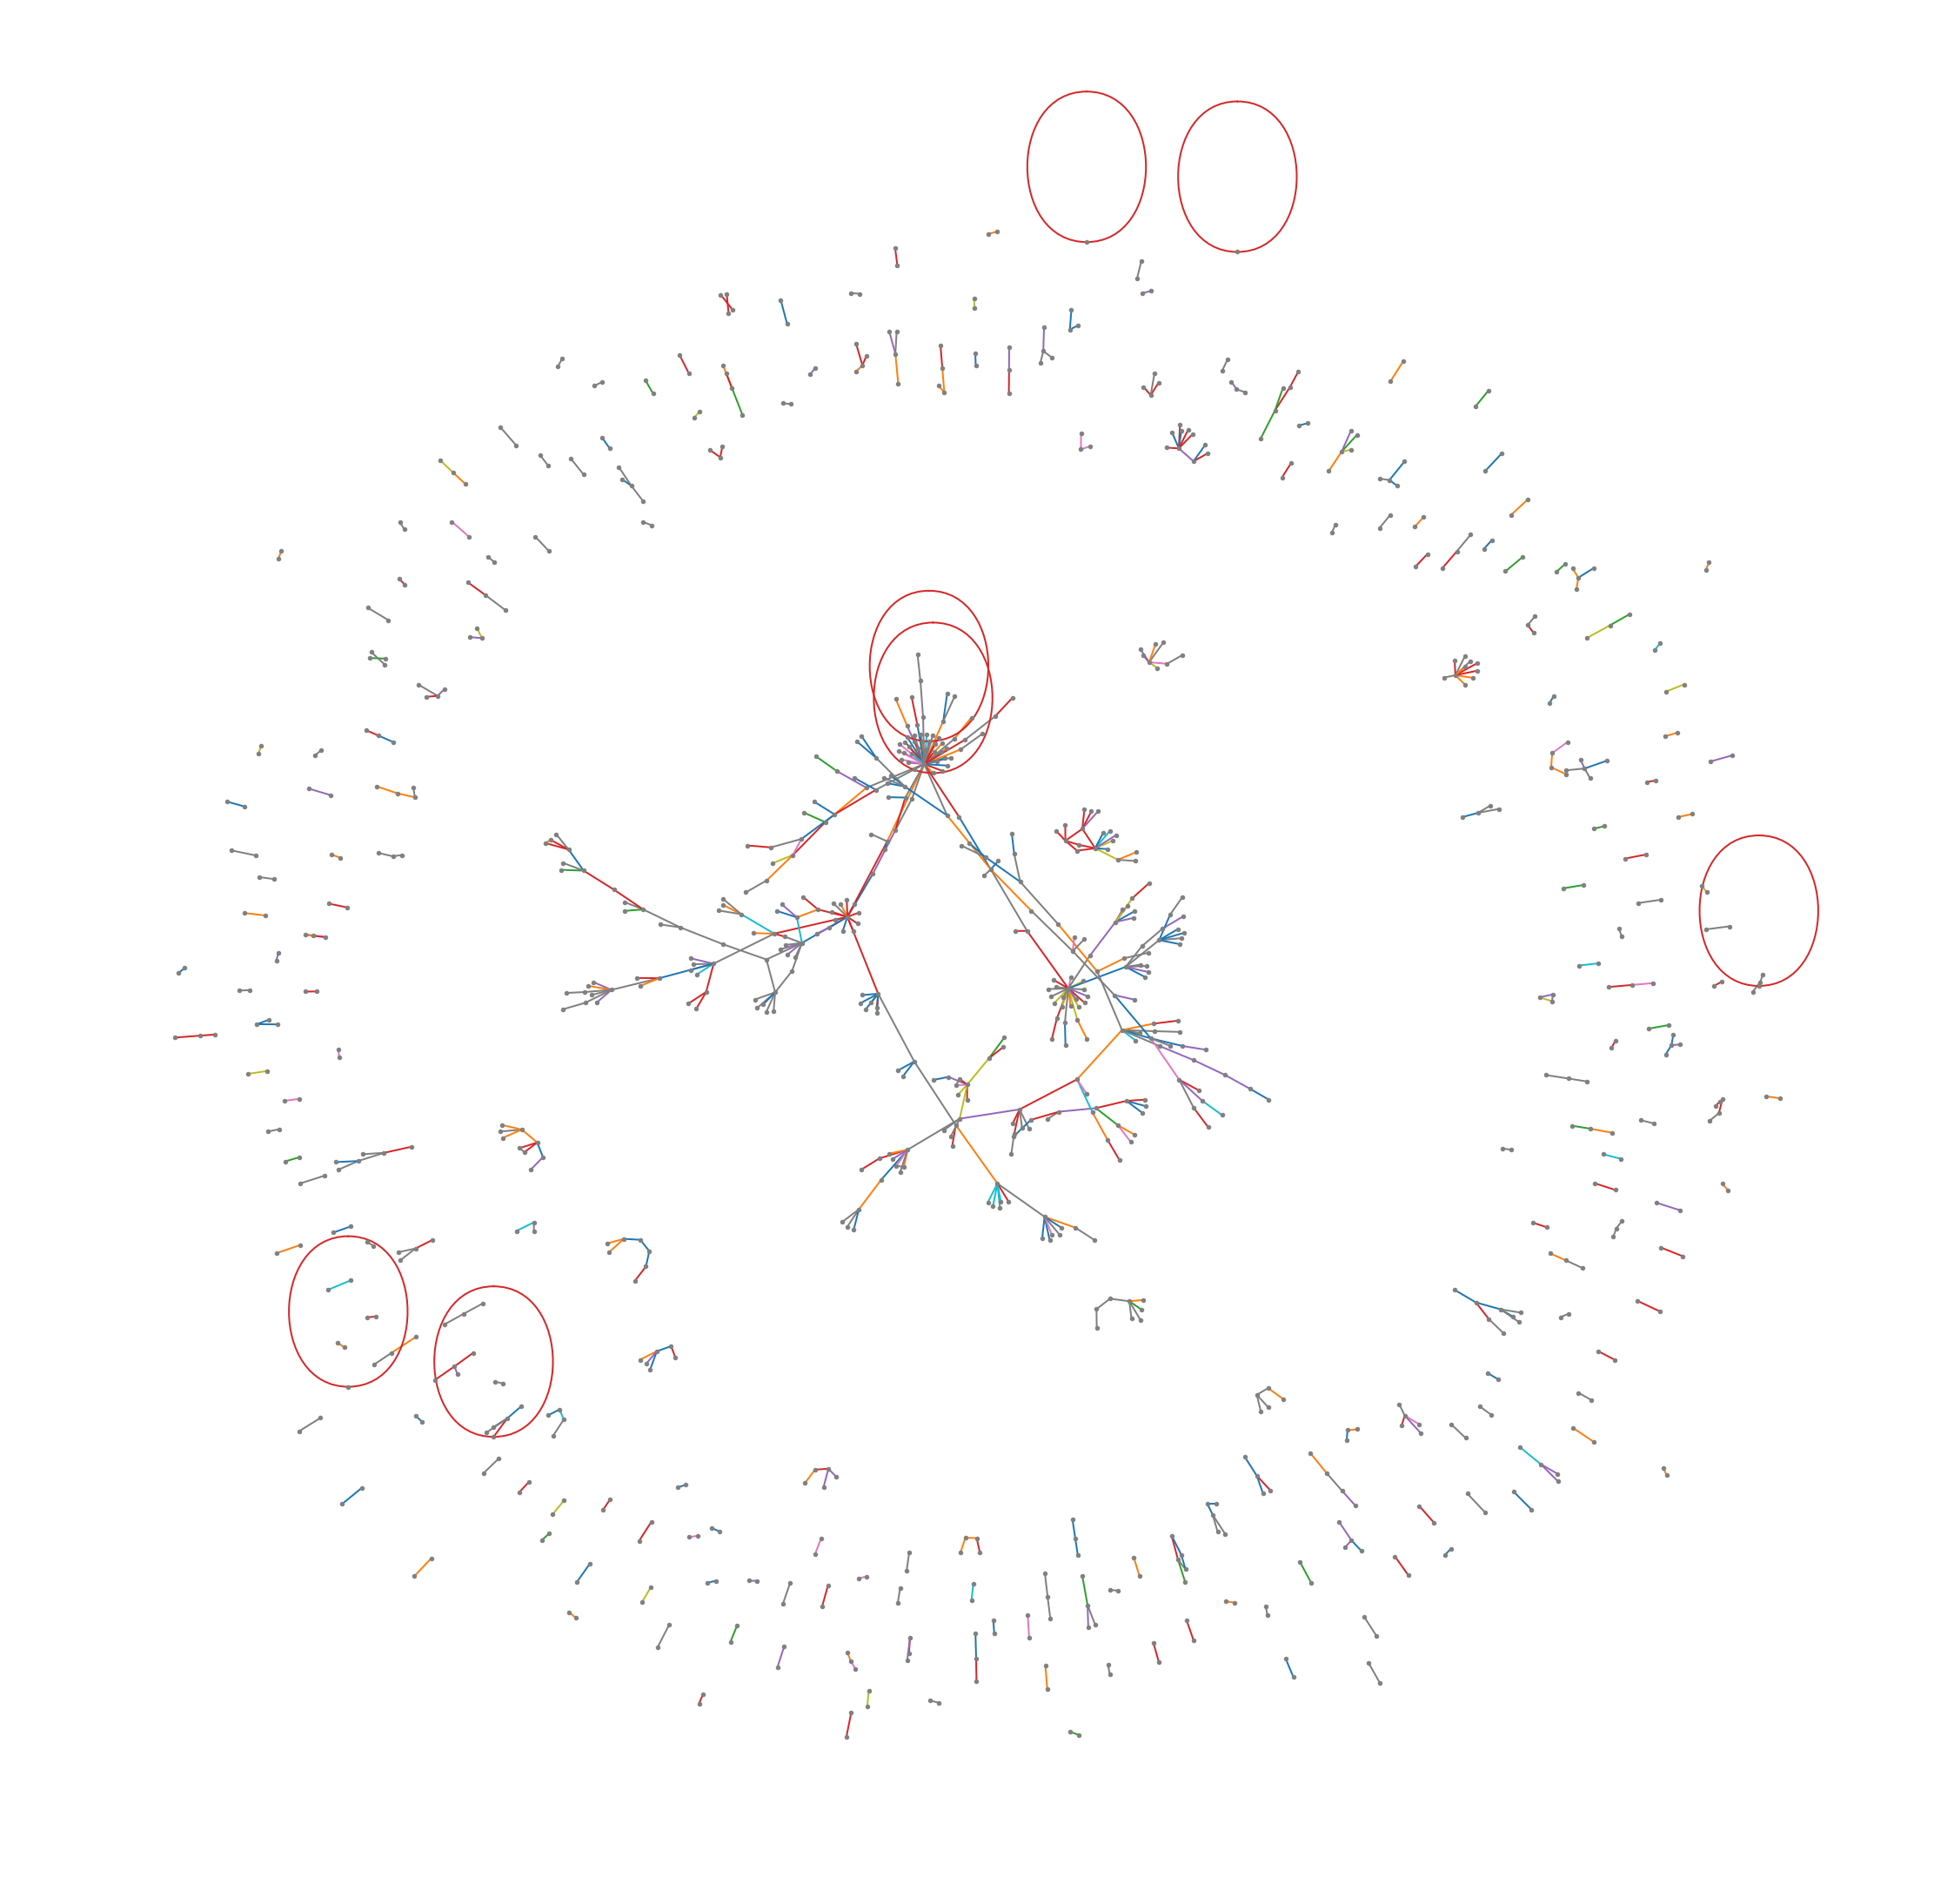

In [32]:
fig, ax = plt.subplots(figsize=(40,40))

G_sup_d2 = nx.from_pandas_edgelist(philly_12, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_d2, seed=7)
nx.draw(G_sup_d2, pos, edge_color=philly_12['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

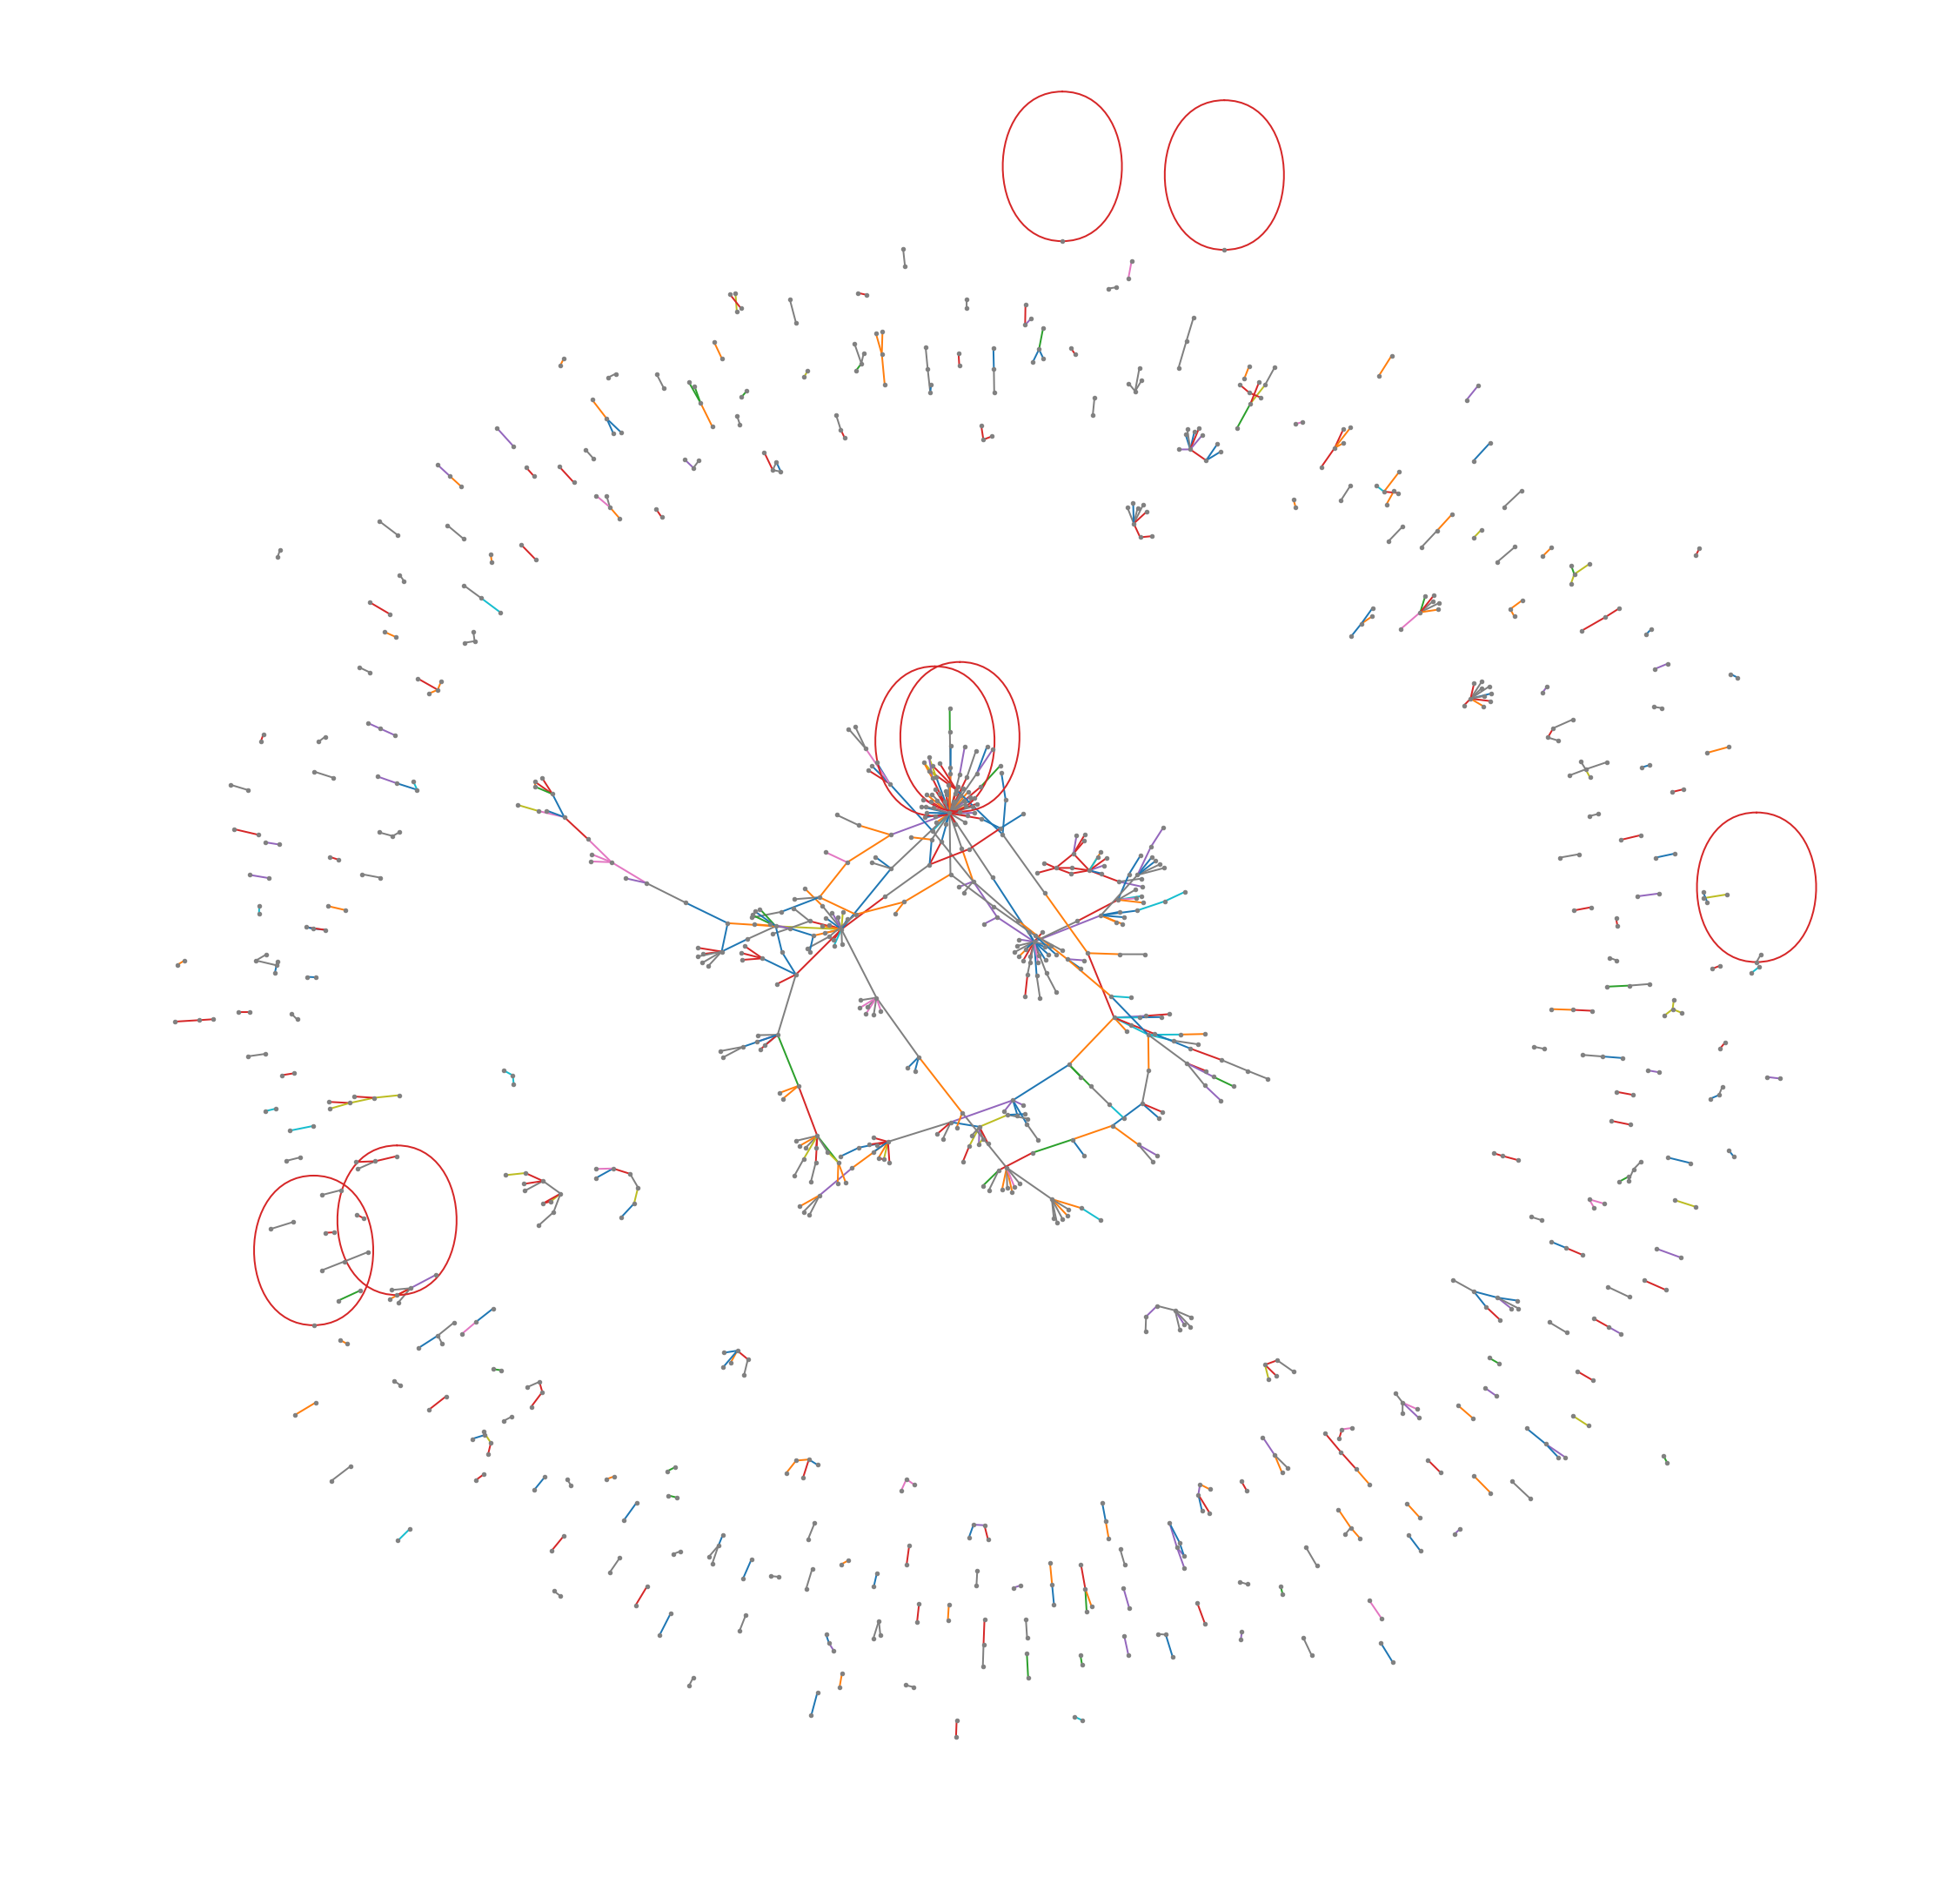

In [33]:
fig, ax = plt.subplots(figsize=(40,40))

G_sup_d3 = nx.from_pandas_edgelist(philly_13, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_d3, seed=7)
nx.draw(G_sup_d3, pos, edge_color=philly_13['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

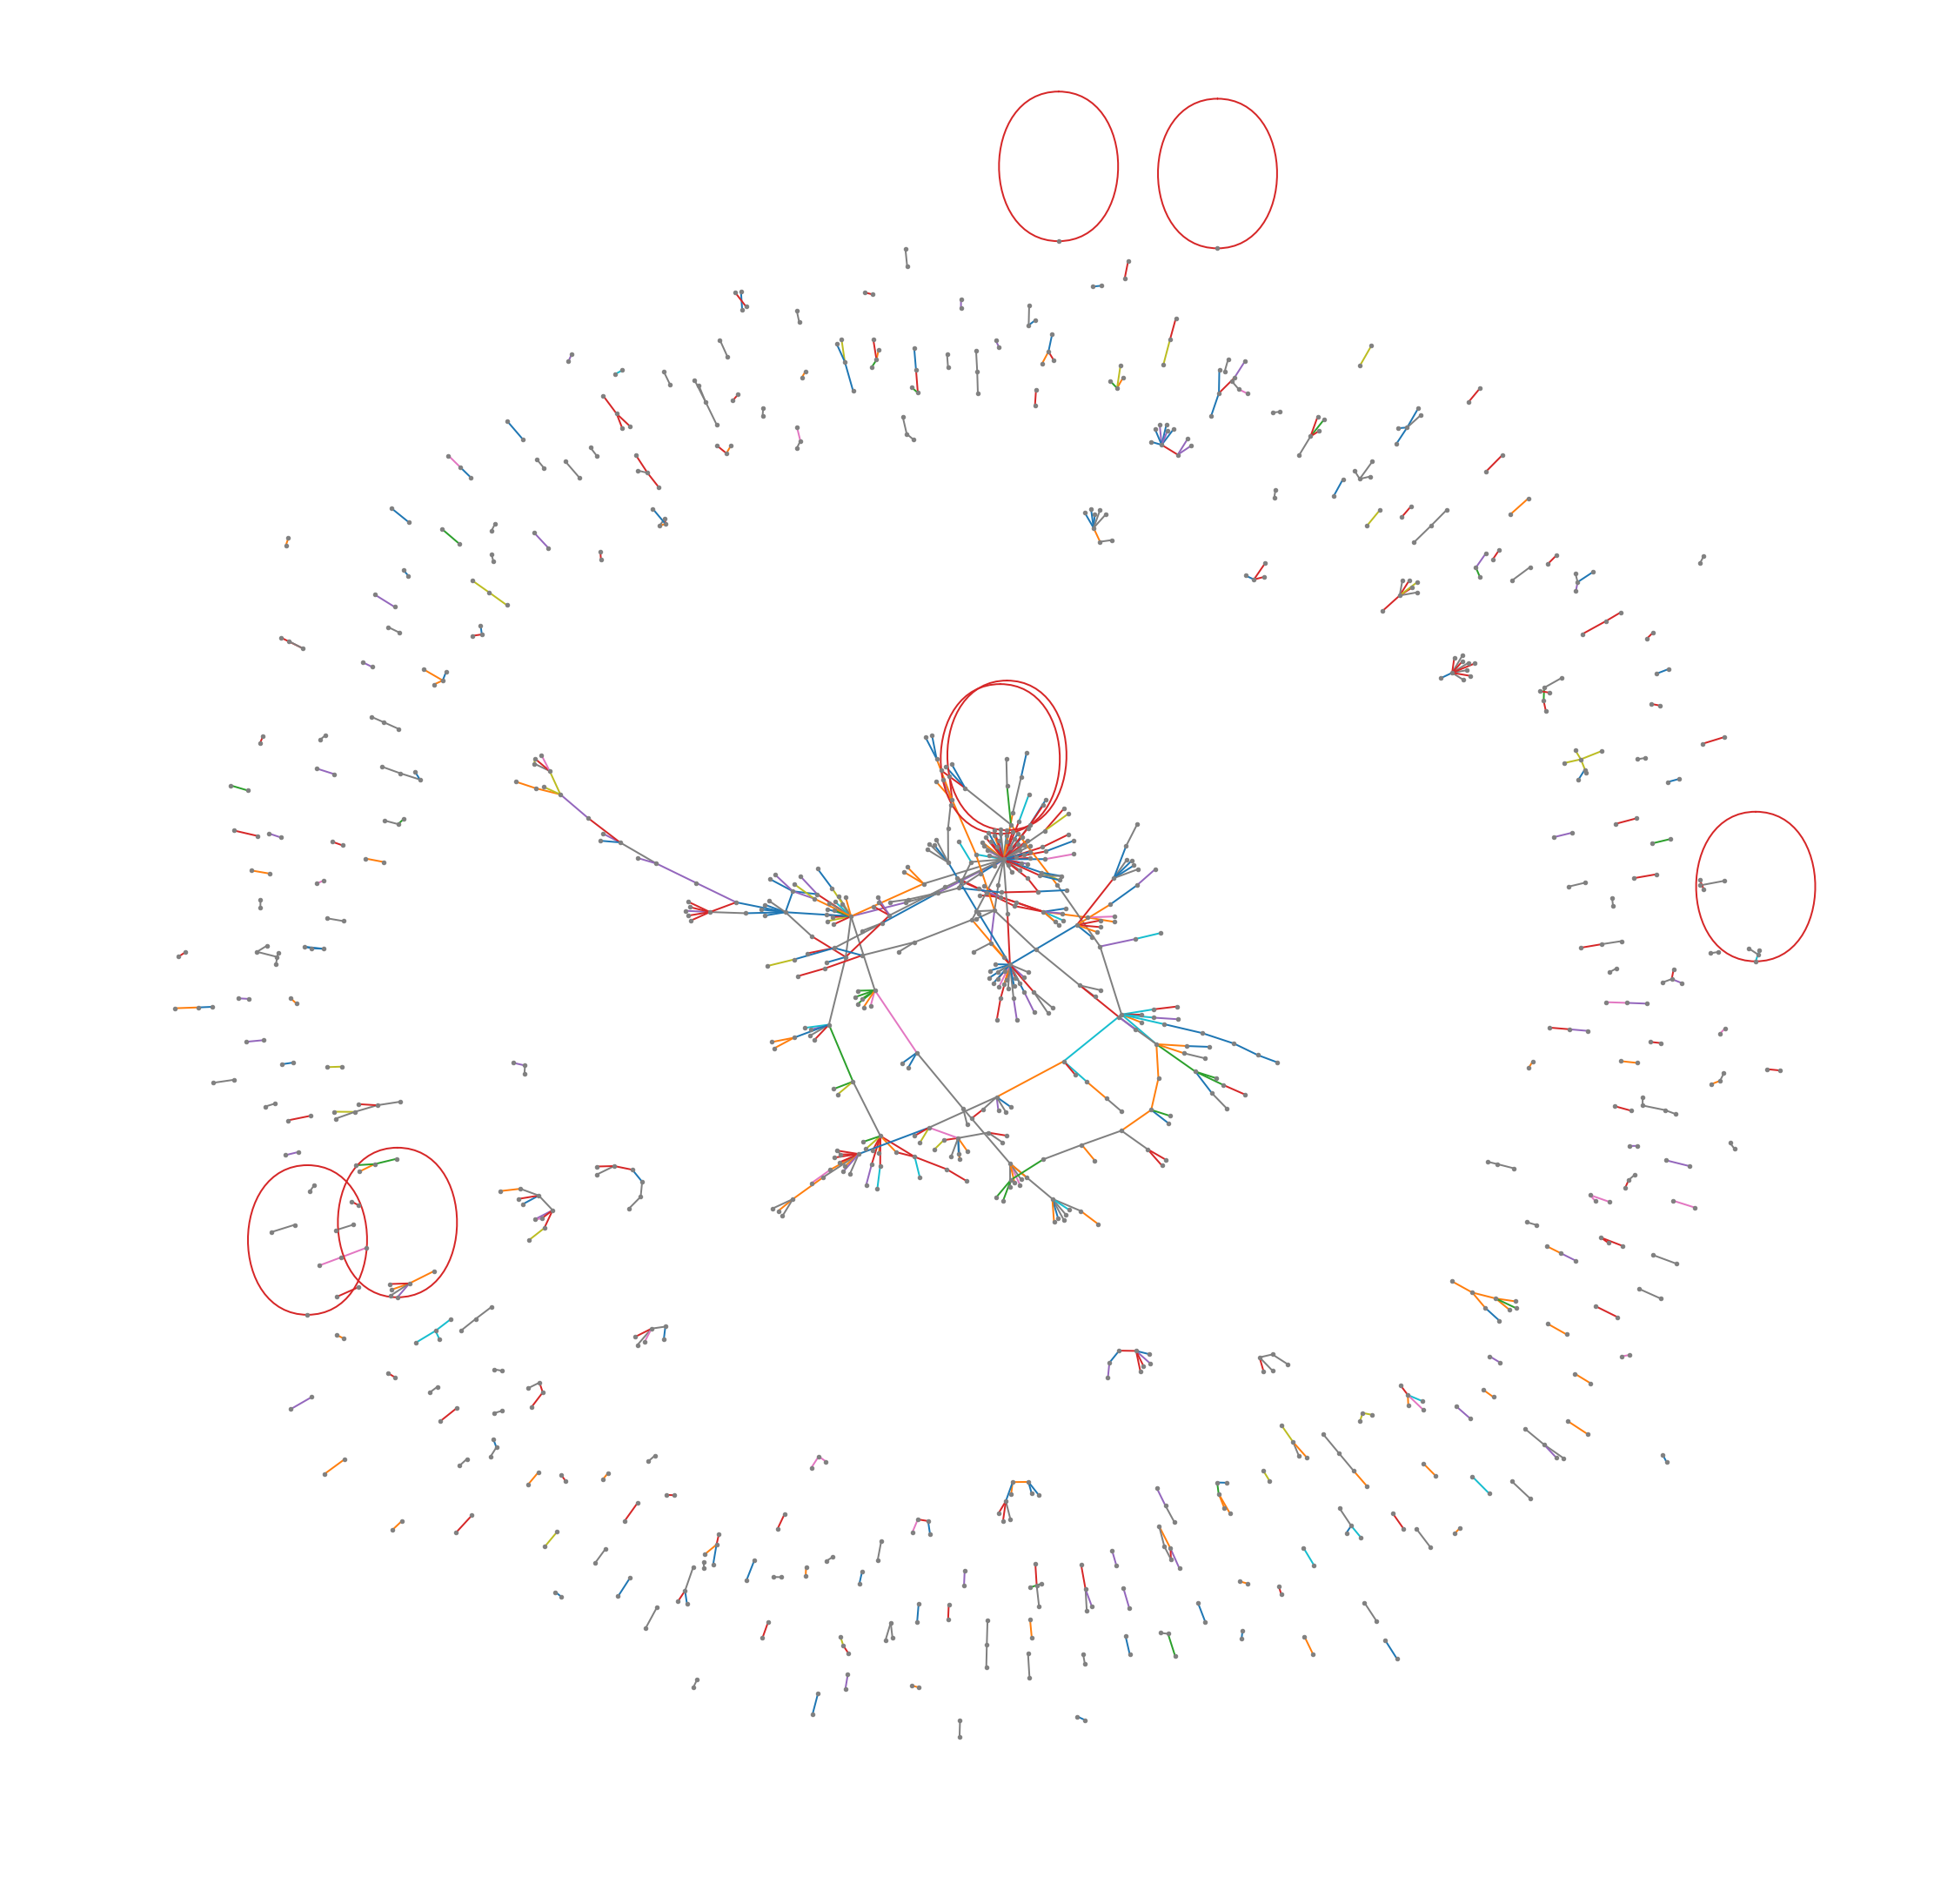

In [34]:
fig, ax = plt.subplots(figsize=(40,40))

G_sup_d4 = nx.from_pandas_edgelist(philly_14, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_d4, seed=7)
nx.draw(G_sup_d4, pos, edge_color=philly_14['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

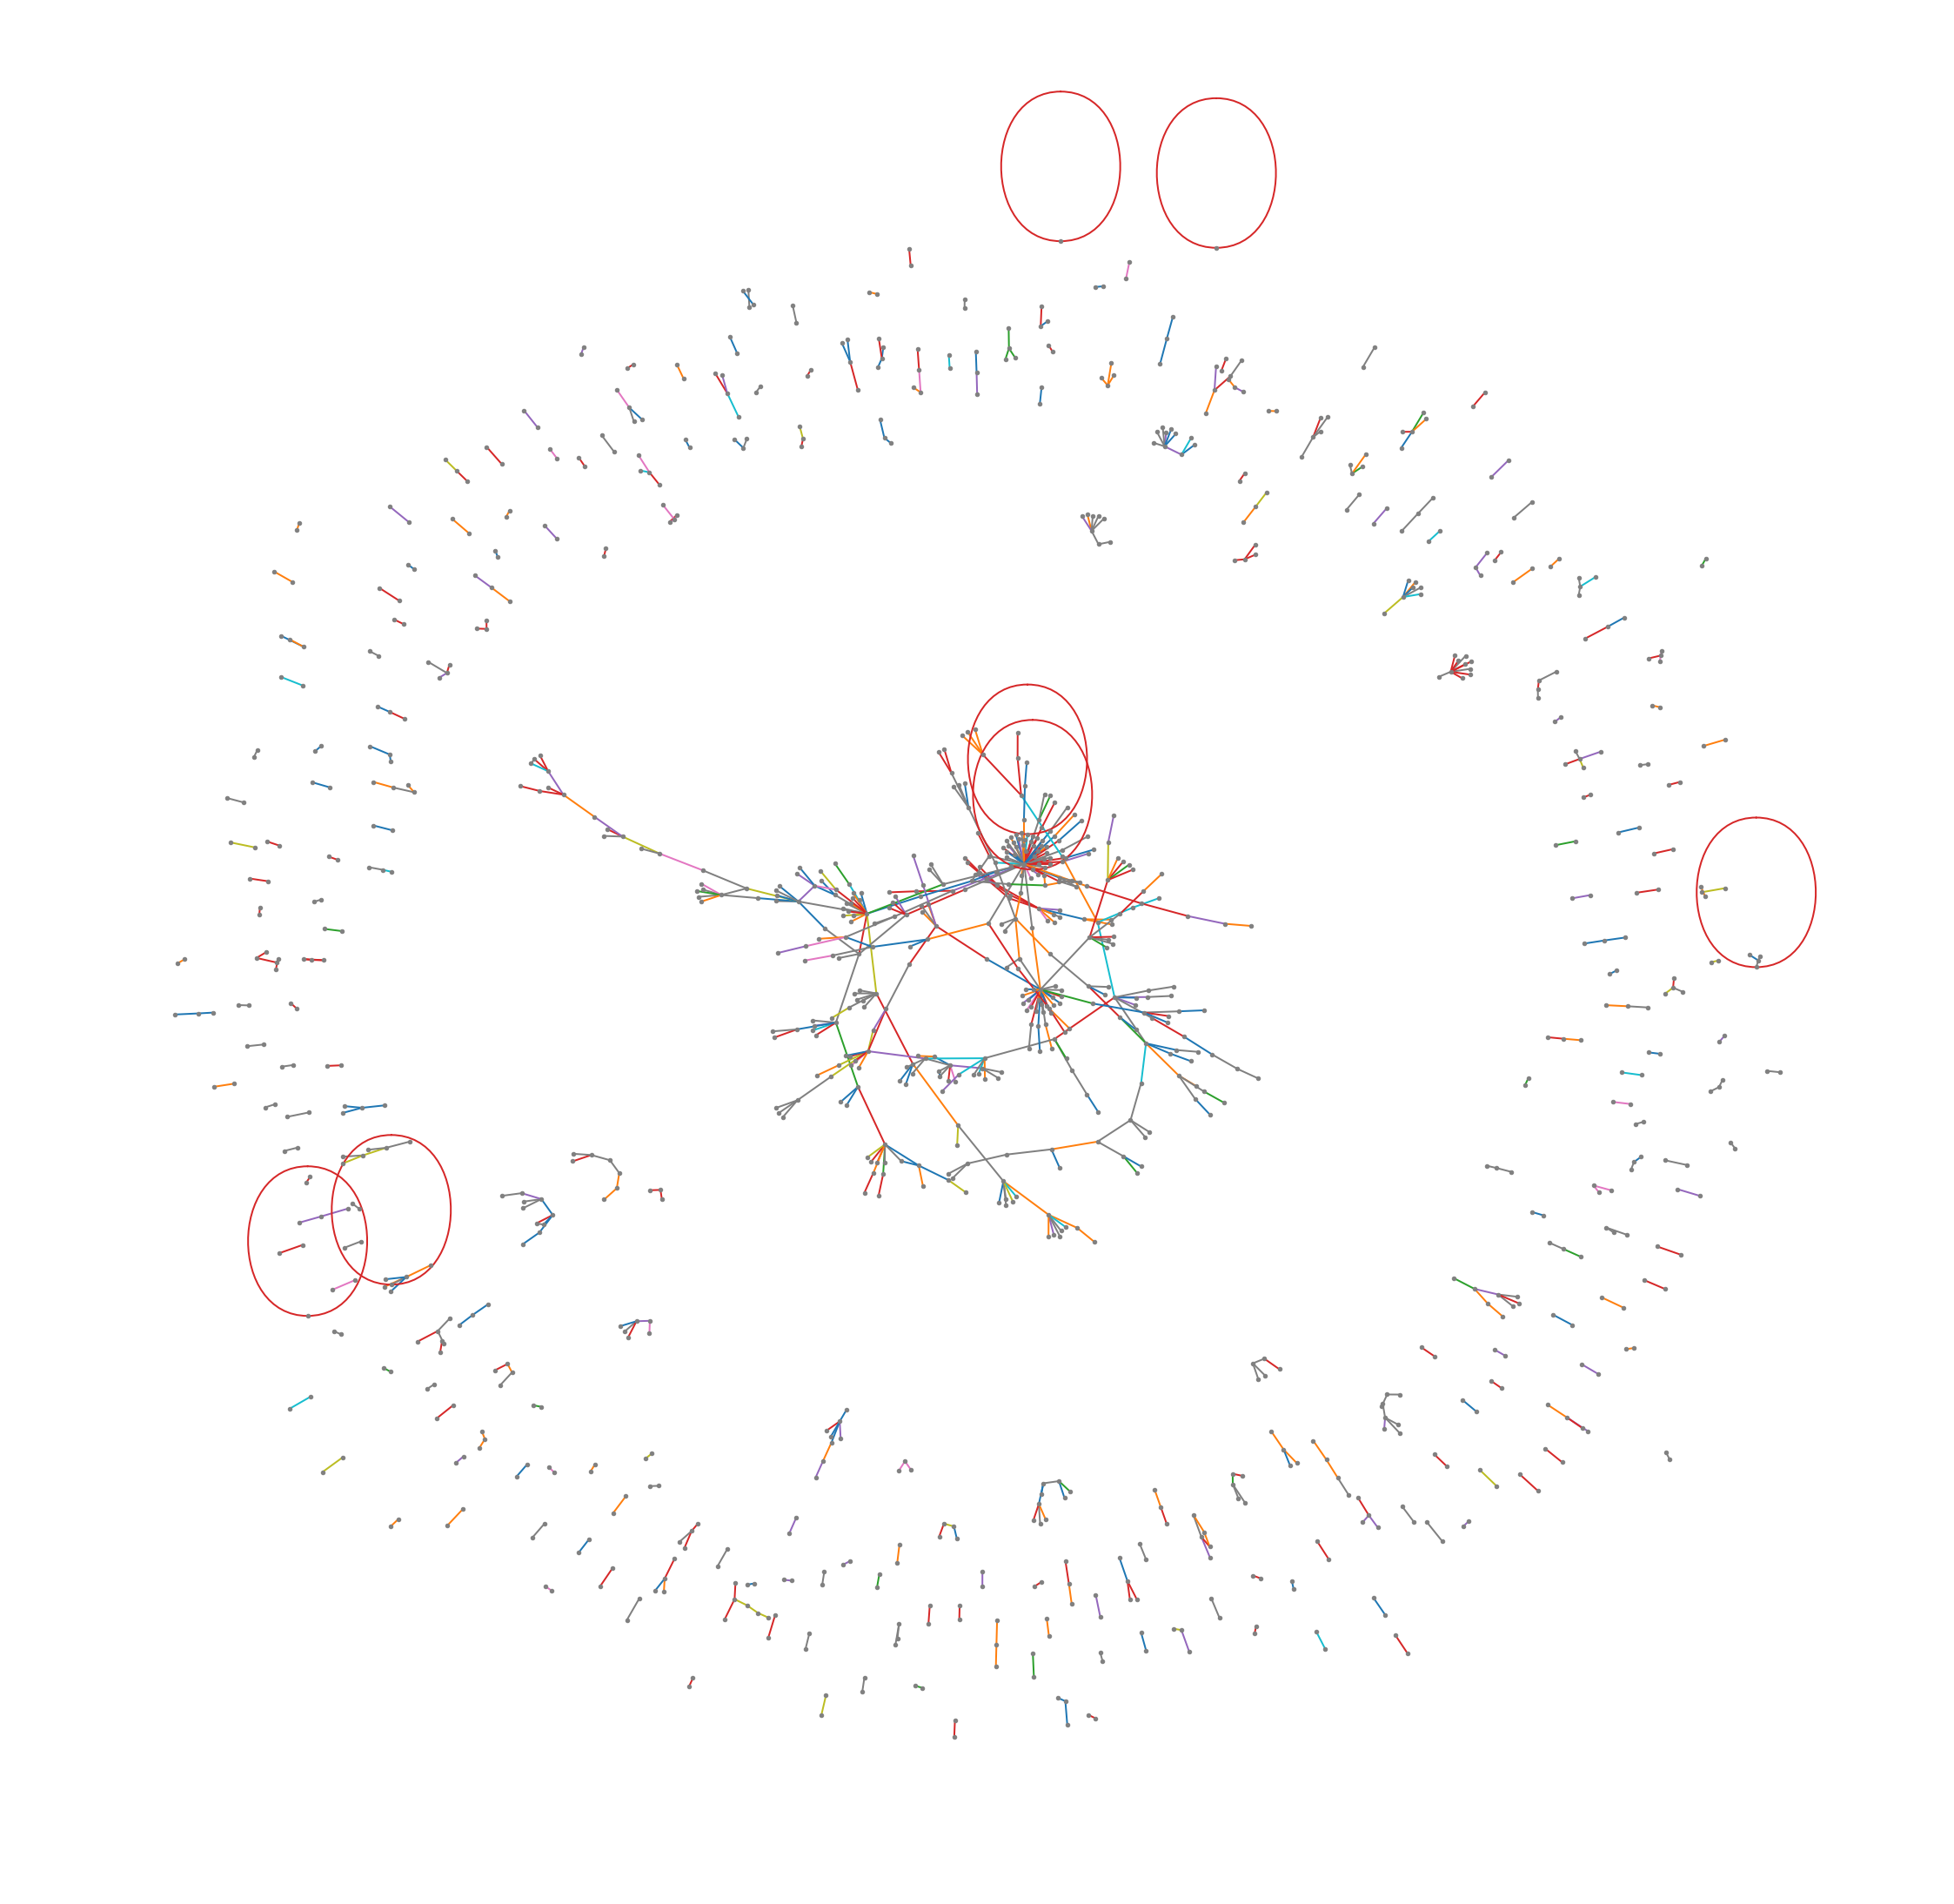

In [35]:
fig, ax = plt.subplots(figsize=(40,40))

G_sup_d5 = nx.from_pandas_edgelist(philly_15, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_d5, seed=7)
nx.draw(G_sup_d5, pos, edge_color=philly_15['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

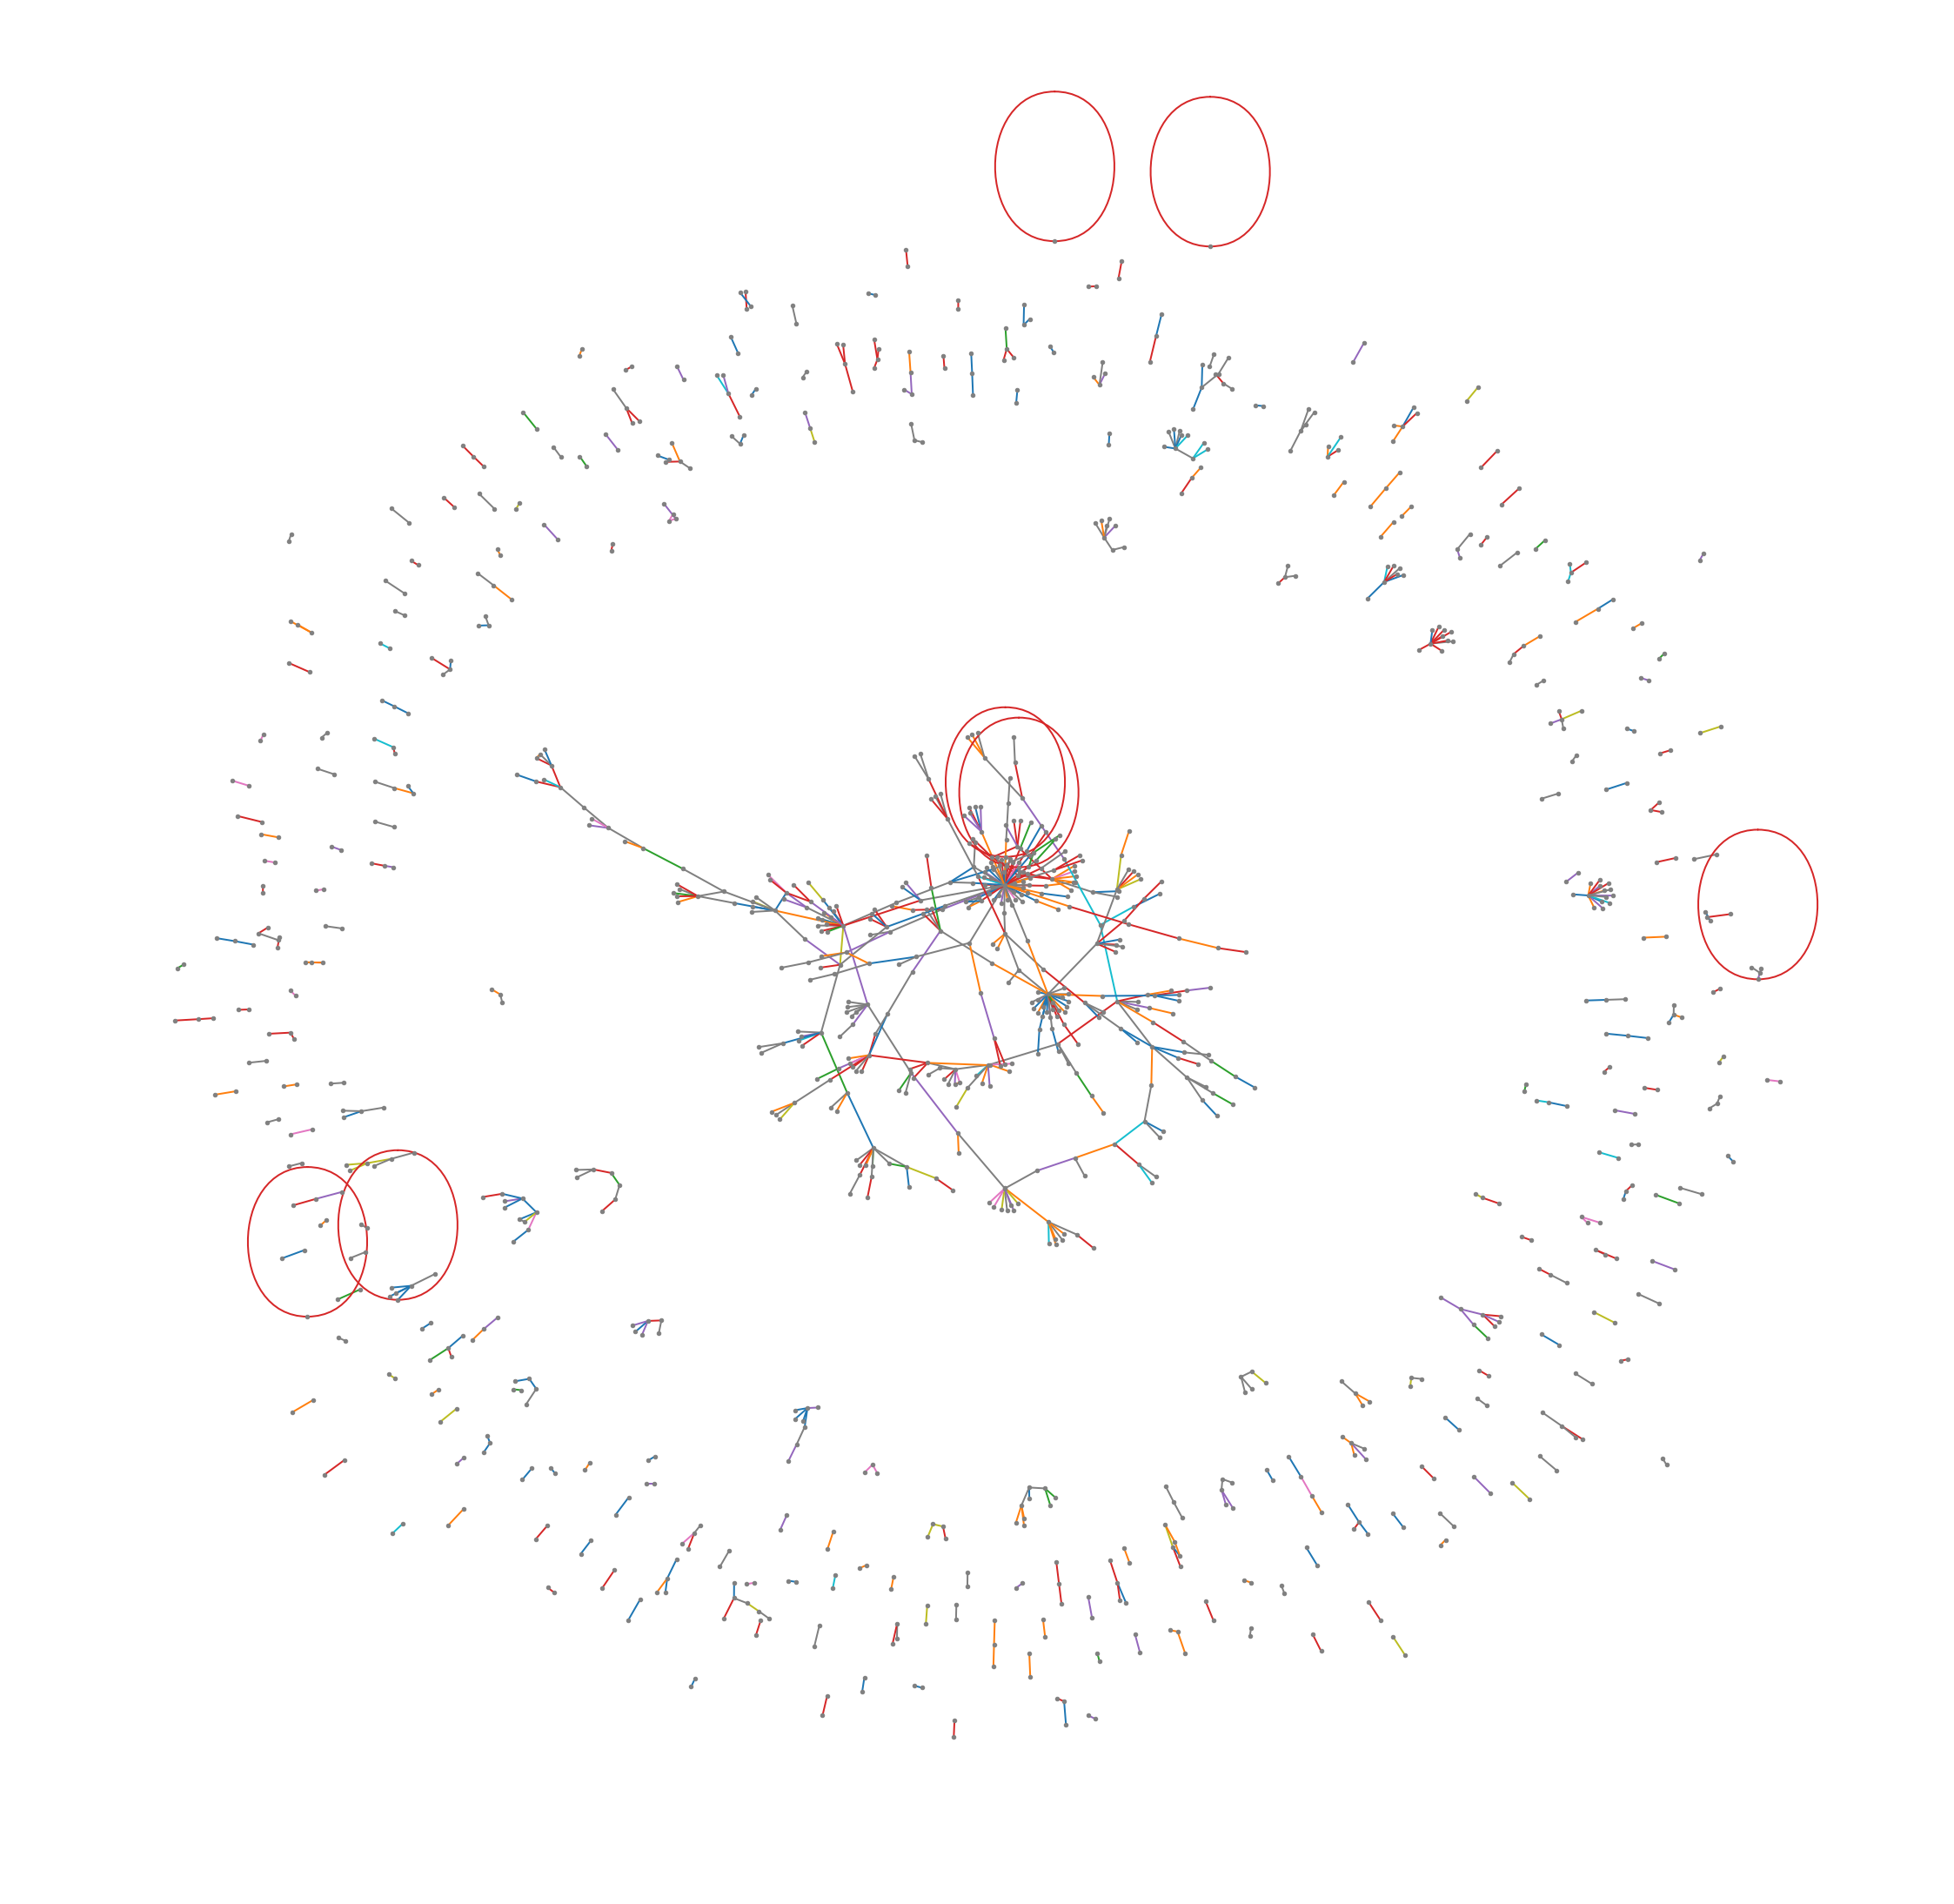

In [36]:
fig, ax = plt.subplots(figsize=(40,40))

G_sup_d6 = nx.from_pandas_edgelist(philly_16, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_sup_d6, seed=7)
nx.draw(G_sup_d6, pos, edge_color=philly_16['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

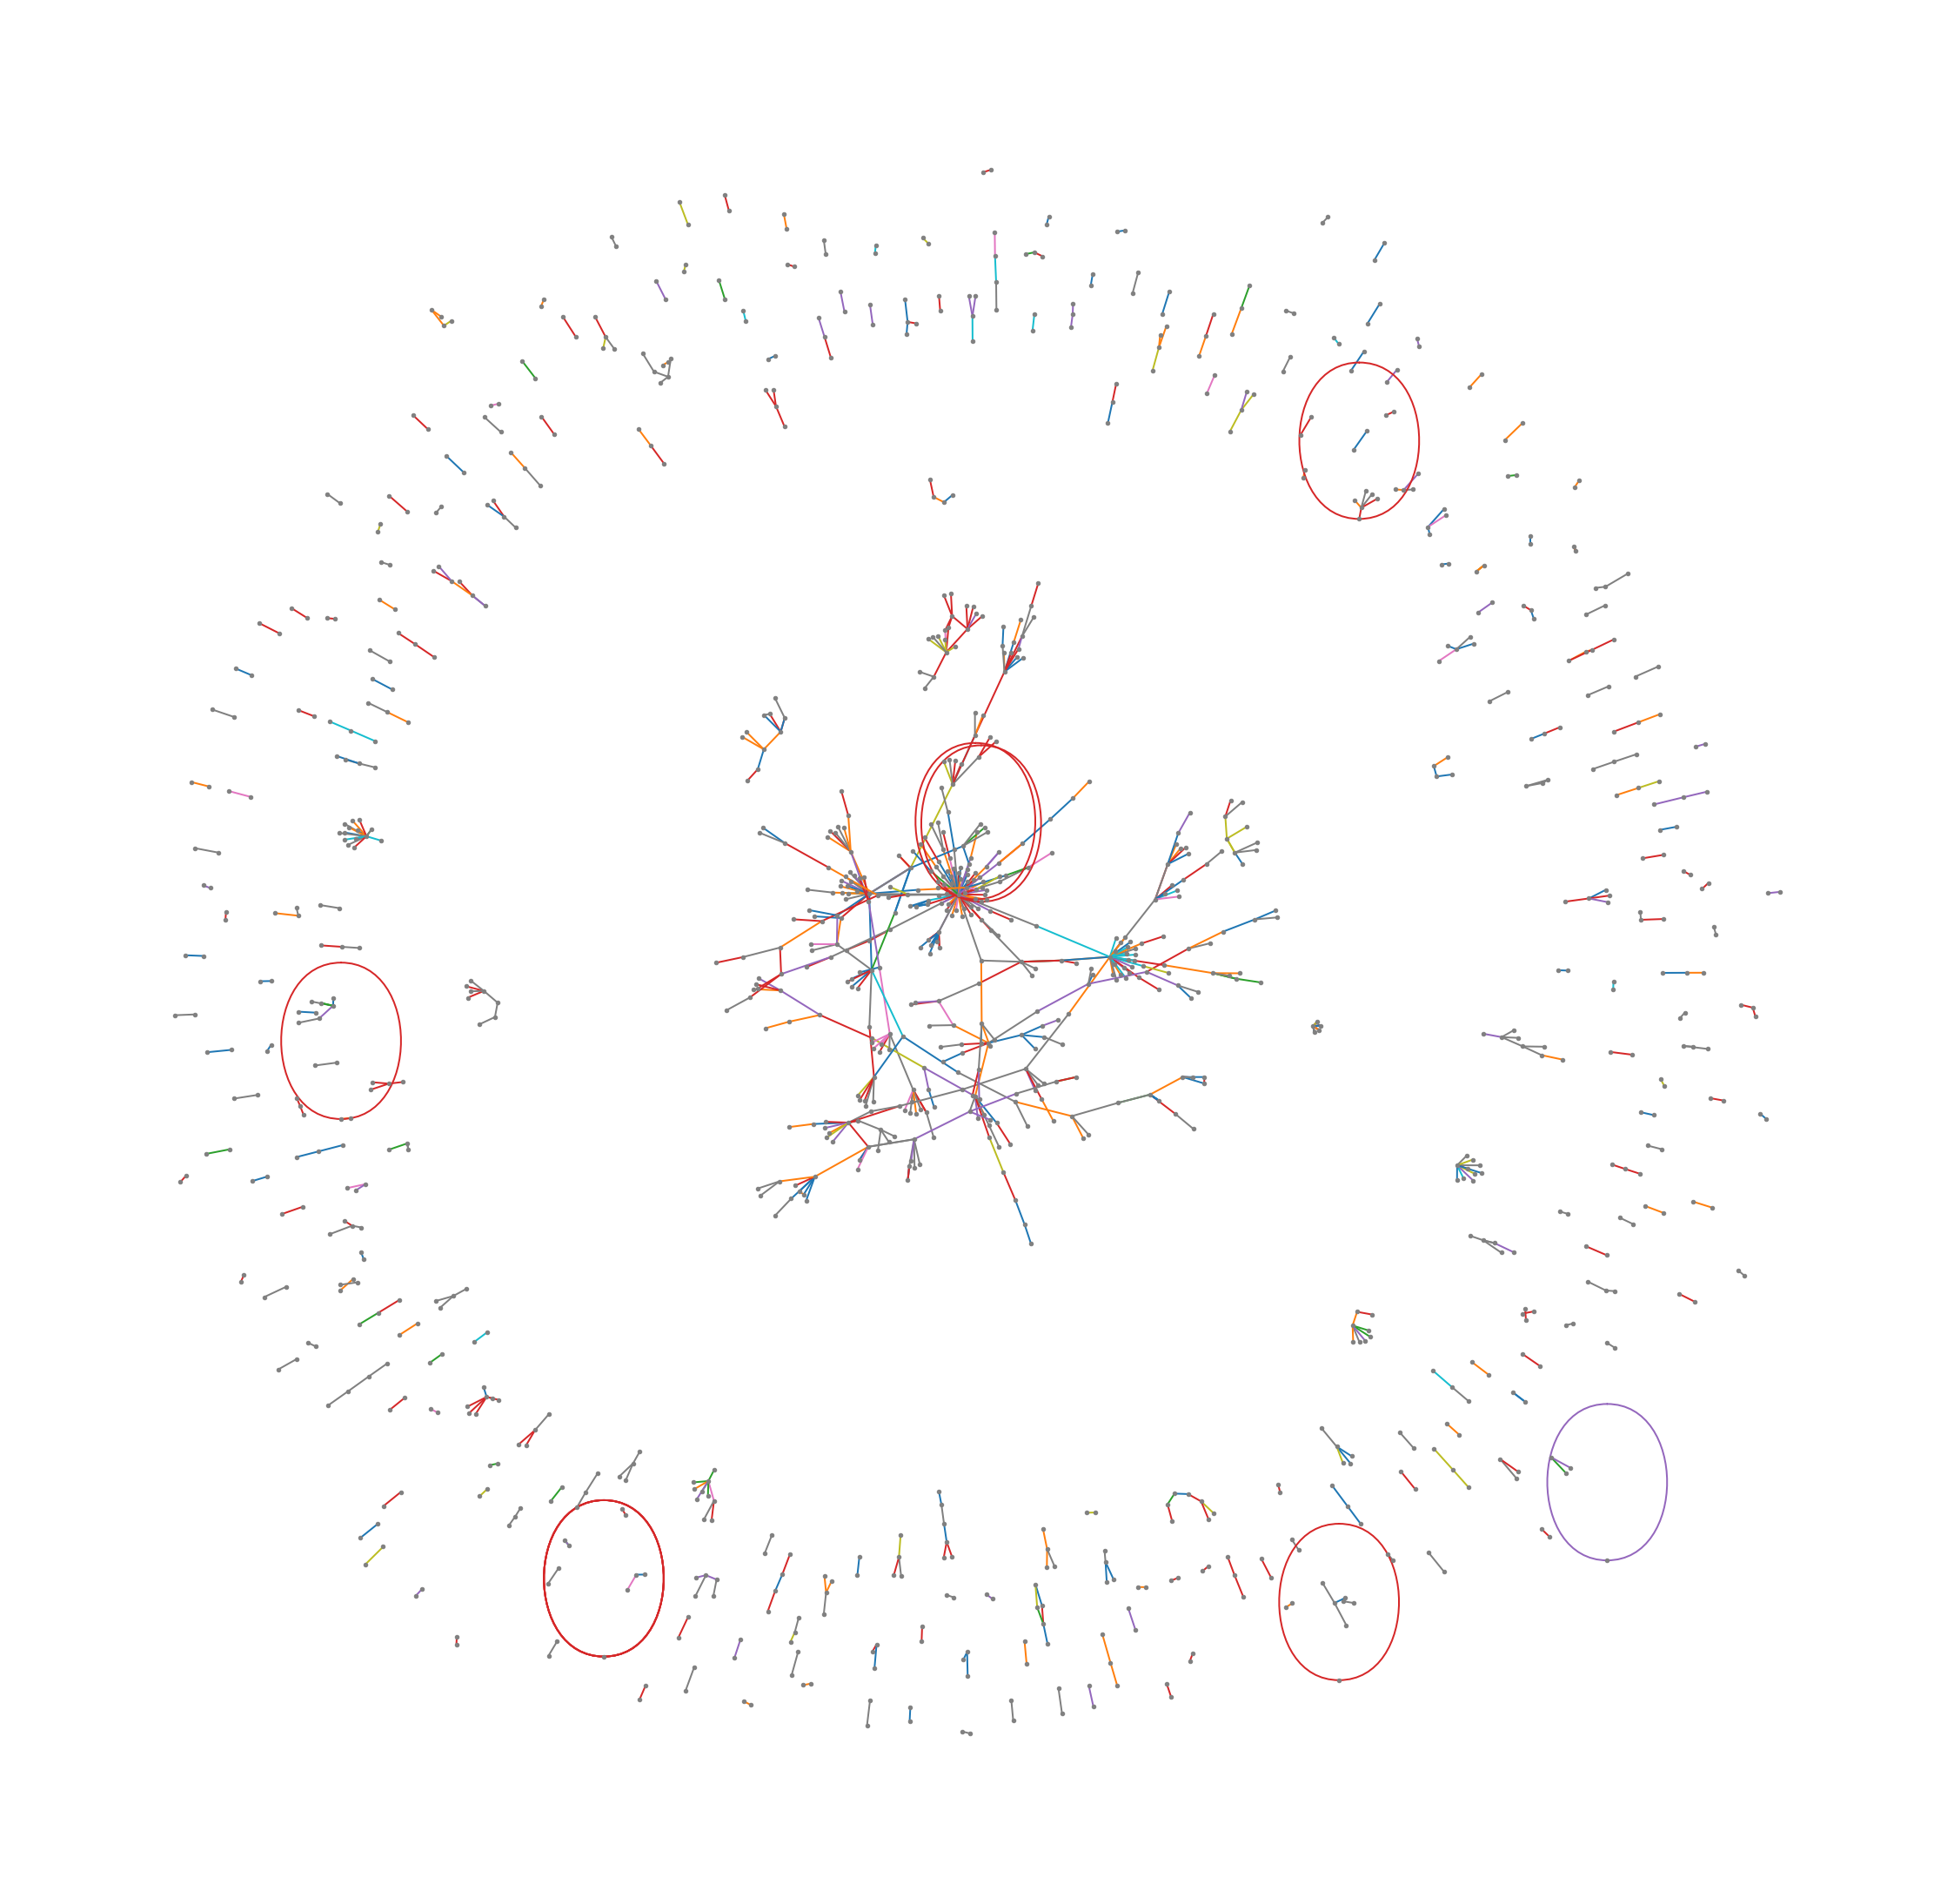

In [37]:
fig, ax = plt.subplots(figsize=(40,40))

pos = nx.spring_layout(G_sup, seed=7)
nx.draw(G_sup, pos, edge_color=riot_philadelphia_superbowl_df['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

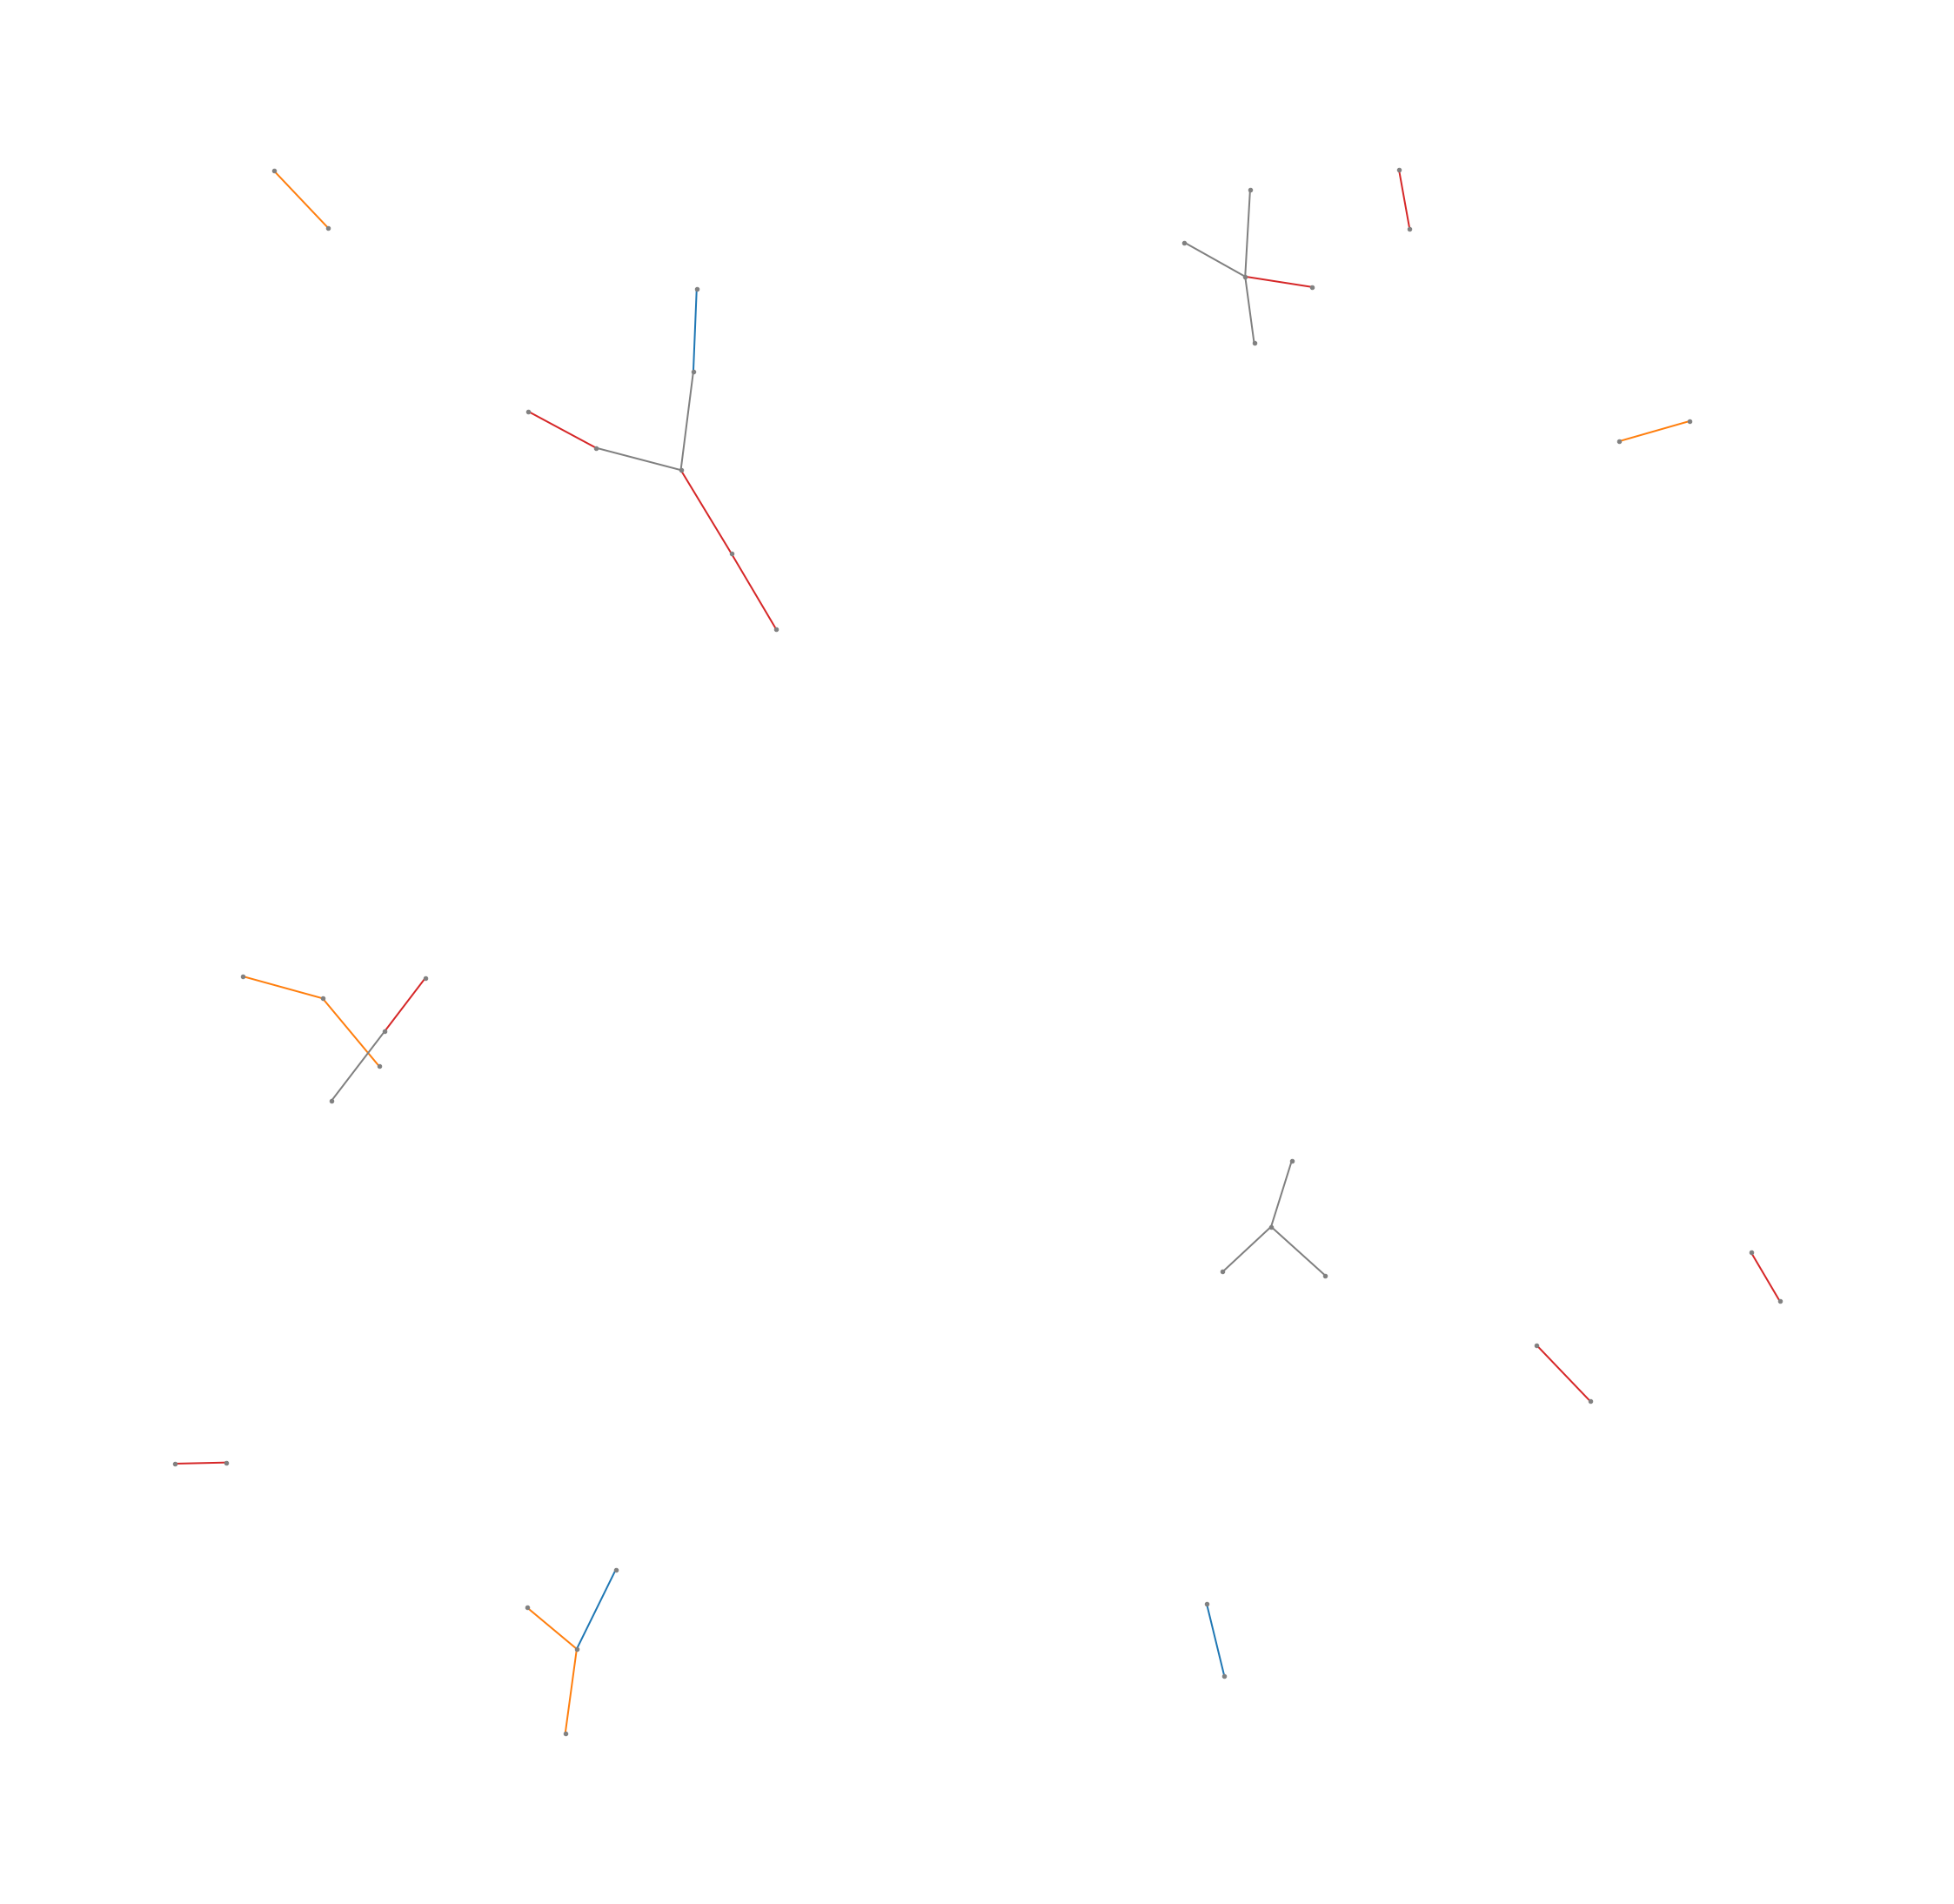

In [38]:
fig, ax = plt.subplots(figsize=(40,40))

G_d4 = nx.from_pandas_edgelist(philly_day4, source = 'Source', target = 'Target')

pos = nx.spring_layout(G_d4, seed=7)
nx.draw(G_d4, pos, edge_color=philly_day4['Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

In [39]:
riot_philadelphia_superbowl_df

Unnamed: 0                                             Source  \
0         210977  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
1         210978  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
2         210979  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
3         210980  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
4         210981  6f282a5c07bb64e6d9a5a1a966e38d00e182f413ed40ad...   
...          ...                                                ...   
1017      211994  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1018      211995  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1019      211996  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1020      211997  89647023735340bdff9a8c5d222f2d28197b05f6996446...   
1021      211998  89647023735340bdff9a8c5d222f2d28197b05f6996446...   

                                                 Target Emotion   Timestamp  \
0     24680bba6628fe320ab162aed12f99c2df89a6c67976d8...   Anger  2018-02-04   
1     4b19da469528e096da234c9d36f5e8759ae6af3076b0ab...   Anger  2018-02-04   
2     588cca59fdc58d5ebb3ab21e0748ce7a96927ac67aec3d...   Anger  2018-02-04   
3     45afeec9161994ad2dd982a3aa553fed2cd16fb10fae34...   Anger  2018-02-04   
4     04f687d115b133db092102da1a05f4acd75cabb9bc18f0...   Anger  2018-02-04   
...                                                 ...     ...         ...   
1017  3a4d3f988901f502b44f63bbe31821650729a18389349b...   Trust  2018-02-10   
1018  725daf6626f8428235c06dabc0976abfd8b3ae29a9de15...   Trust  2018-02-10   
1019  8a49b6b3540be495e9764130677c35d765da59fd893d23...   Trust  2018-02-10   
1020  bec926830b6b498e719878a7af72f83d7019f14db2dc80...   Trust  2018-02-10   
1021  196de2870ef56b723014fe5d6cbed0393b6f4297f6339b...   Trust  2018-02-10   

     Day_Color  Day                        Event    Color  
0      #3c0791    1  riot_philadelphia_superbowl  #d62728  
1      #3c0791    1  riot_philadelphia_superbowl  #d62728  
2      #3c0791    1  riot_philadelphia_superbowl  #d62728  
3      #3c0791    1  riot_philadelphia_superbowl  #d62728  
4      #3c0791    1  riot_philadelphia_superbowl  #d62728  
...        ...  ...                          ...      ...  
1017   #F9F871    7  riot_philadelphia_superbowl  #1f77b4  
1018   #F9F871    7  riot_philadelphia_superbowl  #1f77b4  
1019   #F9F871    7  riot_philadelphia_superbowl  #1f77b4  
1020   #F9F871    7  riot_philadelphia_superbowl  #1f77b4  
1021   #F9F871    7  riot_philadelphia_superbowl  #1f77b4  

[1022 rows x 9 columns]

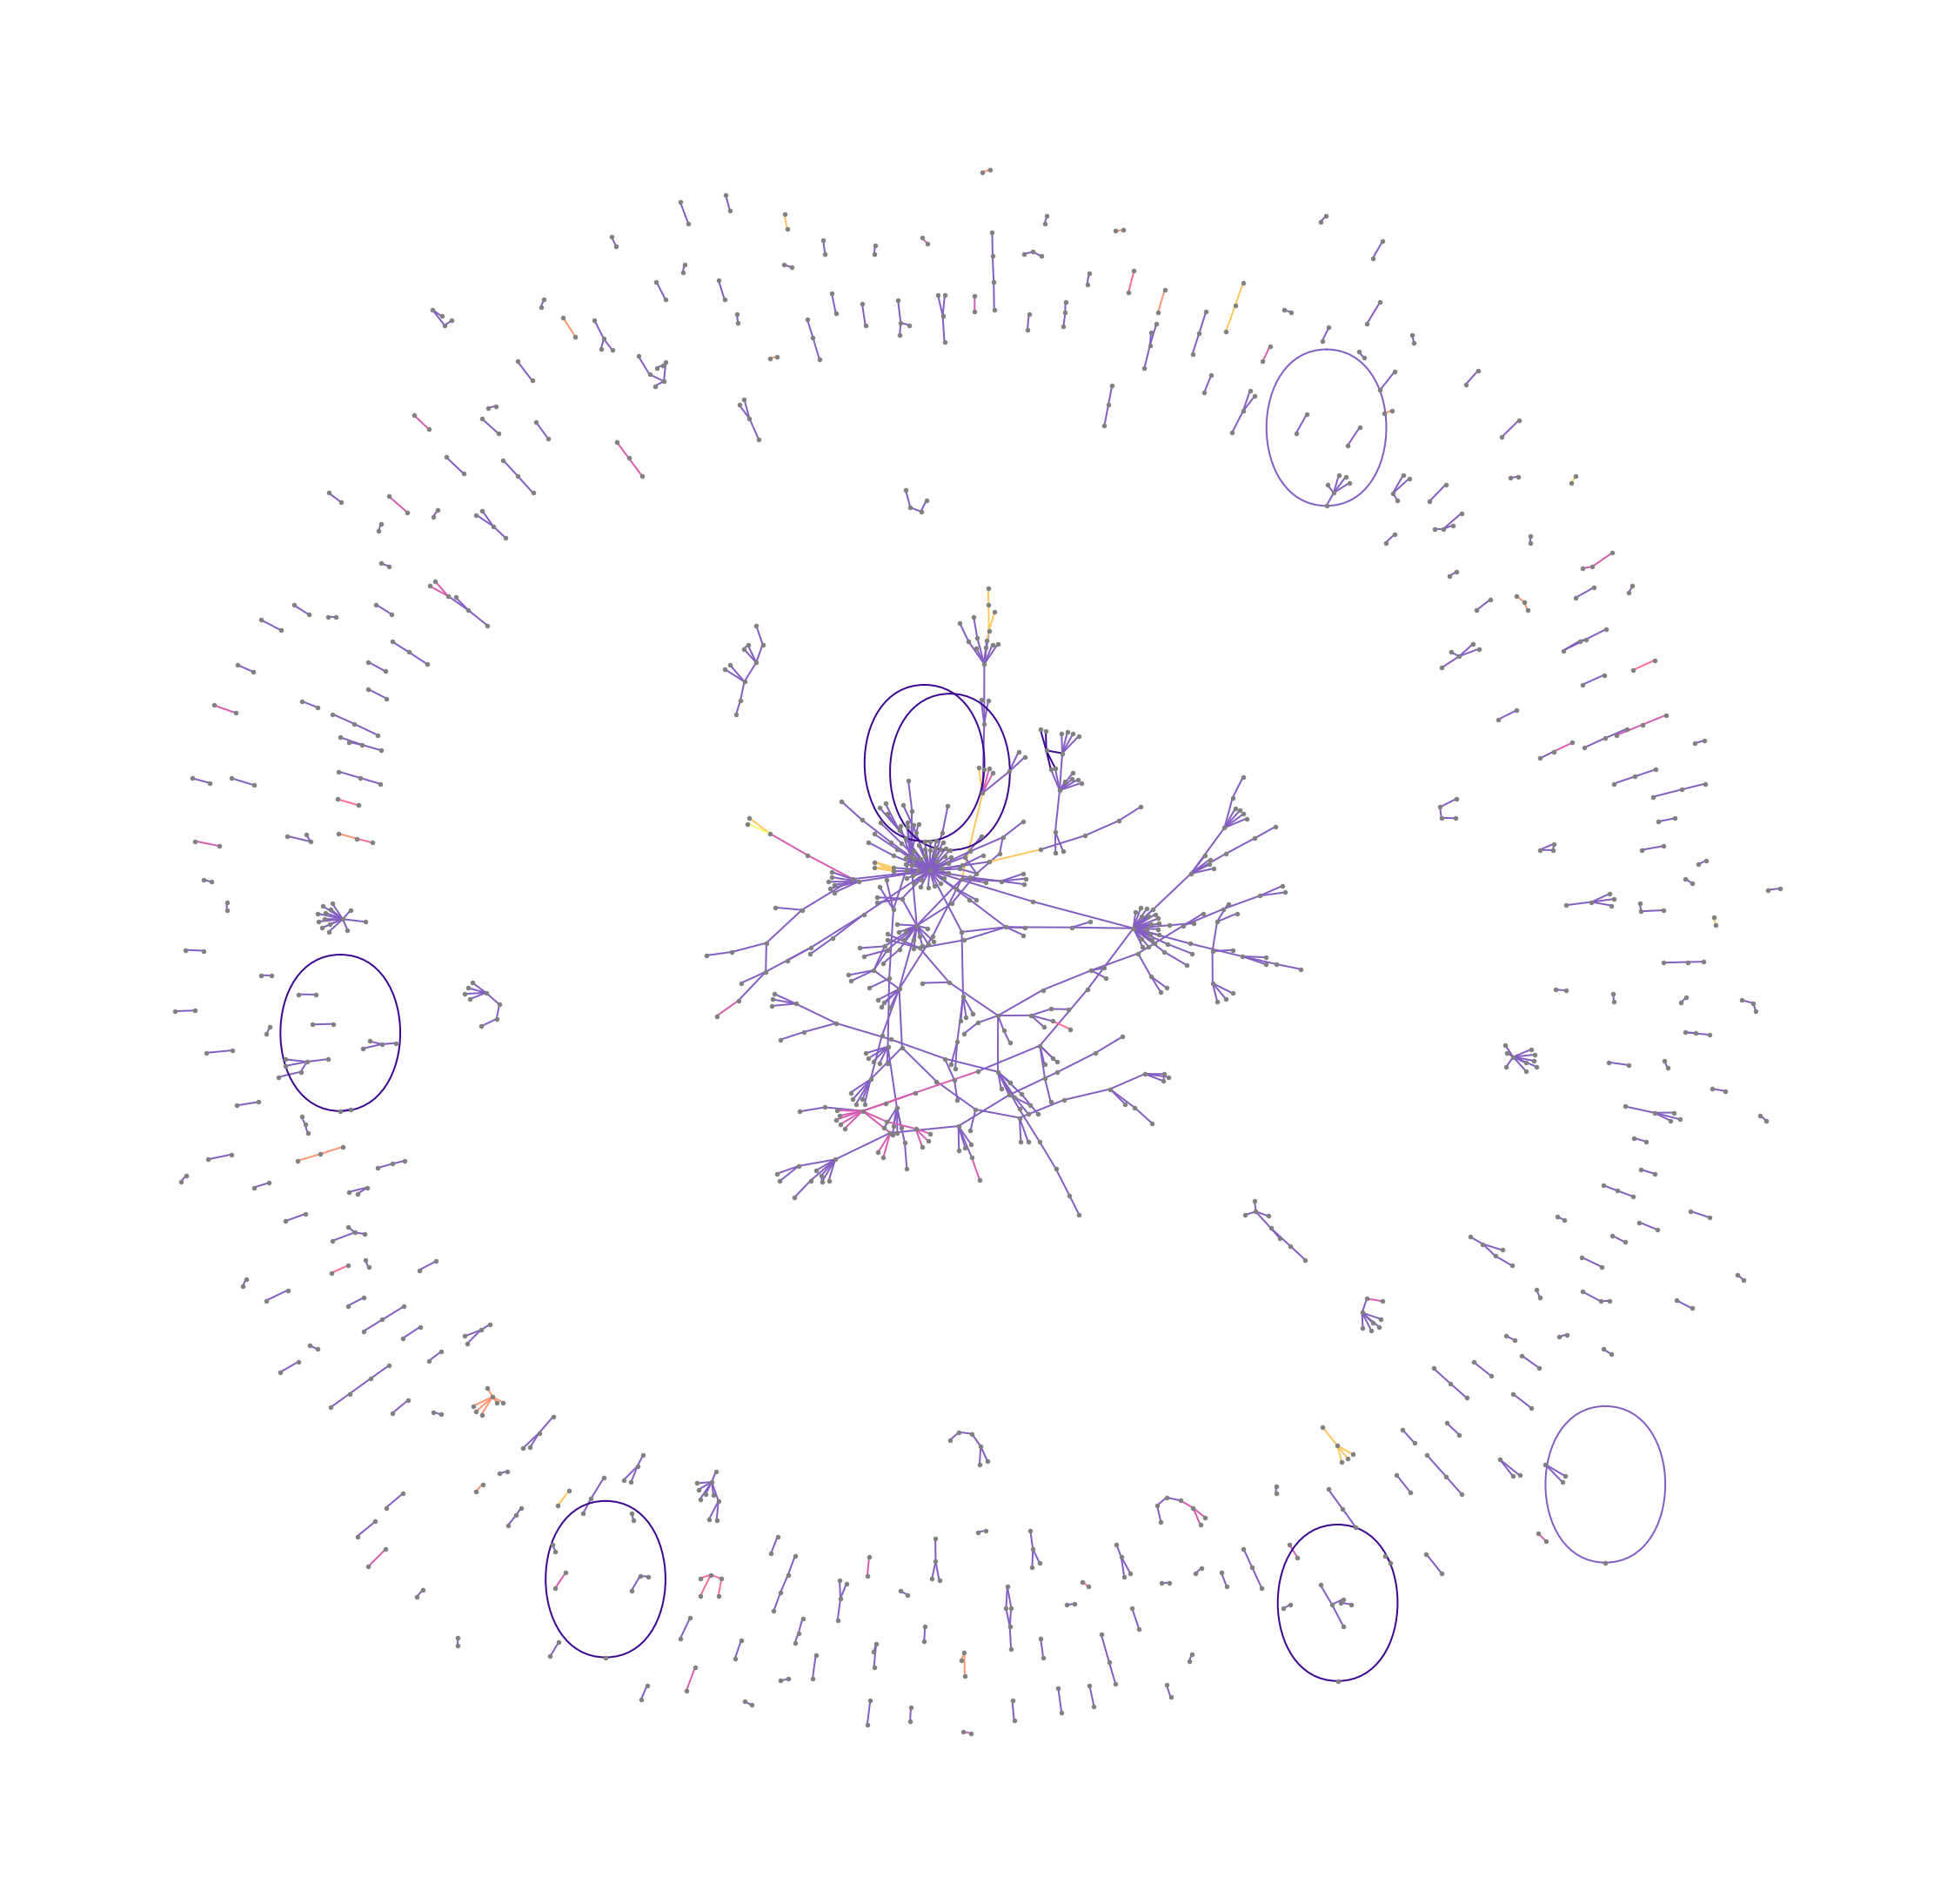

In [32]:
fig, ax = plt.subplots(figsize=(40,40))

pos = nx.spring_layout(G_sup, seed=7)
nx.draw(G_sup, pos, edge_color=riot_philadelphia_superbowl_df['Day_Color'], width = 2, node_color = 'gray', node_size = 20)
plt.show()

In [40]:
print("Day 1:")
print("Number of nodes: " + str(G_sup_d1.number_of_nodes()))
print("Number of edges: " + str(G_sup_d1.number_of_edges()))
      
print("Day 2:")
print("Number of nodes: " + str(G_sup_d2.number_of_nodes()))
print("Number of edges: " + str(G_sup_d2.number_of_edges()))
      
print("Day 3:")
print("Number of nodes: " + str(G_sup_d3.number_of_nodes()))
print("Number of edges: " + str(G_sup_d3.number_of_edges()))
      
print("Day 4:")
print("Number of nodes: " + str(G_sup_d4.number_of_nodes()))
print("Number of edges: " + str(G_sup_d4.number_of_edges()))
      
print("Day 5:")
print("Number of nodes: " + str(G_sup_d5.number_of_nodes()))
print("Number of edges: " + str(G_sup_d5.number_of_edges()))
      
print("Day 6:")
print("Number of nodes: " + str(G_sup_d6.number_of_nodes()))
print("Number of edges: " + str(G_sup_d6.number_of_edges()))
      
print("Day 7:")
print("Number of nodes: " + str(G_sup.number_of_nodes()))
print("Number of edges: " + str(G_sup.number_of_edges()))

Day 1:
Number of nodes: 6
Number of edges: 5
Day 2:
Number of nodes: 969
Number of edges: 750
Day 3:
Number of nodes: 1064
Number of edges: 830
Day 4:
Number of nodes: 1098
Number of edges: 857
Day 5:
Number of nodes: 1129
Number of edges: 884
Day 6:
Number of nodes: 1160
Number of edges: 911
Day 7:
Number of nodes: 1164
Number of edges: 1022
